# Rascunho

## Lista de etapas/estudo 
## Exercício 1:
O que é:
- Determinante secular 
- (a partir do método de Huckel!)
- Níveis de energia
- Diagrama de níveis
- Preenchimento eletrônico
- Escrever todos os orbitais

## Exercício 2:
O que é:
- Estrutura eletrônica pi
- Sistemas planares
- **Quais são os parametros de alpha e beta (disponíveis nos slides da aula)**
- Construir a matriz de Huckel com o hamiltoniano H
- O que a conectividade (i,j) representam?
(para cada um dos 3 sistemas de atomos)
### 2.2 Procedimento (p/ cada molecula):
- 1. Esquema inicial (desenhar as moleculas e indicar as ligações pi)
- O que é a ligação pi?
- 2. Matriz H, construir a partir dos parametros do slide
- 3. Diagonalização. Autovalores (Eu) Autovetores (C**(mi))
- O que os autovalores e autovetores representam??
- 4. Realizar o preenchimento eletrônico
- 5. Identificar o HOMO e o LUMO
- O que são esses negocios?
- 6. População eletrônica por sitio
- O q q é essa formula?
- 7. Ordens de ligação pi 
- O que são as ligações i-j?
- O que é essa formula?
- 8. Mapas HOMO e LUMO; Fazer diagramas com magnitudes mode(Ci) e fase (sinal positivo e negativo dos sitios)
- 9. Discussão - Compare naftaleno, quinolina e diaza; Selecionando em termos de Egap, Qi, Pij e a localização dos lóbulos em HOMO e LUMO
- O que são os termos Egap, Qi, Pij
- O que é um lóbulo
### 2.3 Entrega:
- 1. Figura - Esquema do naftaleno numerado.
- 2. Figura - Esquemas da quinolina (mono-aza) e do diaza-naftaleno escolhido (mesma numeração), com N destacados
- 3. Tabela – Matriz de conectividade (ou lista de vizinhos) segundo a sua numeração.
- 4. Figura – Espectro de energias do naftaleno com HOMO/LUMO marcados.
- 5. Tabela – Autovalores Eμ/β (naftaleno) com indicação de ocupação.
- 6. Figura – Espectros para quinolina e diaza (lado a lado).
- 7. Tabela – Populações qi (naftaleno, quinolina, diaza).
- 8. Tabela – Ordens pij para ligações próximas ao(s) N.
- 9. Figura – Mapas HOMO (naftaleno, quinolina, diaza).
- 10. Figura – Mapas LUMO (naftaleno, quinolina, diaza).
- 11. Texto final – Comparação crítica (entre 8 e 12 linhas) dos três sistemas.
### Observações:
- Utilize apenas os parâmetros do slide e cite o slide no relatório.
- Respostas genéricas, sem referência à sua numeração e sem comentários próprios, não serão aceitas.
- Para checagem: ∑iqi=10 (número total de elétrons π no naftaleno). Nos aza-derivados, mantenha a contagem total coerente com 1 elétron π por sítio.
- Verifique tr(H)=∑μEμ como checagem da diagonalização.


# Exercício 1

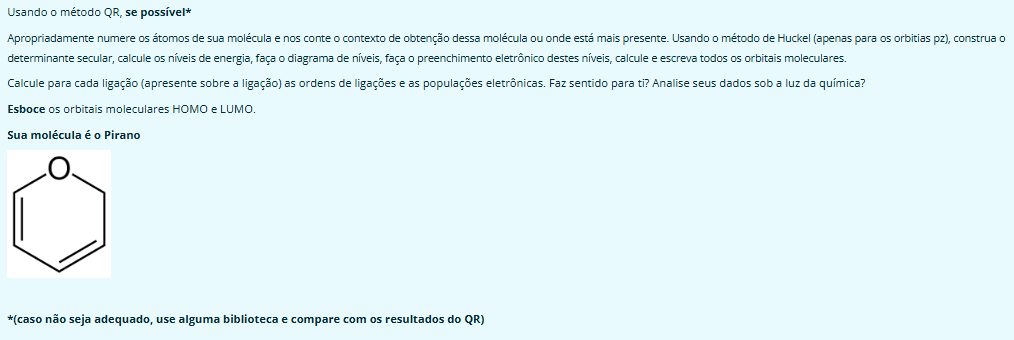

## Código

In [309]:
#Bibliotecas Externas
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh
from scipy.linalg import eig
# Valores padrão (unidades de β)

alpha_C = 0.0   
alpha_O = 1.0    
beta_CC = 1.0    
beta_CO = 0.8    

![alt text](numeracao_pirano_v2.jpg)

In [310]:
# Não cheguei a usar para montar a matriz

# Matriz de conectividade do Pirano (6 átomos: O1-C2-C3-C4-C5-C6)
connectivity = [
    [0, 1, 0, 0, 0, 1],  # O1 conectado a C2 e C6
    [1, 0, 1, 0, 0, 0],  # C2 conectado a O1 e C3
    [0, 1, 0, 1, 0, 0],  # C3 conectado a C2 e C4
    [0, 0, 1, 0, 1, 0],  # C4 conectado a C3 e C5
    [0, 0, 0, 1, 0, 1],  # C5 conectado a C4 e C6
    [1, 0, 0, 0, 1, 0]   # C6 conectado a C5 e O1
]


### Parâmetros da matriz de huckel
Obtidos pelo slide do professor Pedro Alves da Silva Autreto

$$
H_{i,j} =
\begin{cases}
\alpha_i, & \text{se } i = j \\[6pt]
\beta_{ij}, & \text{se } i \text{ e } j \text{ estão ligados} \\[6pt]
0, & \text{caso contrário}
\end{cases}
$$

Cada átomo ou ligação vai usar os seguintes alphas e betas:

$\alpha_O = 1 \\
\alpha_C = 0 \\
\beta_{C-O} = -0,8 \\
\beta_{C-C} = -0,9 \\
\beta_{C=C} = -1,1 
$




In [311]:
""" #Matriz de Huckel simples, sem considerar as ligações simples e duplas
# Construção da matriz de Huckel
n_atoms = 6
diagonal_principal = [alpha_O, alpha_C, alpha_C, alpha_C, alpha_C, alpha_C]
huckel_matrix = np.zeros((n_atoms, n_atoms))

for i in range(n_atoms):
    for j in range(n_atoms):
        if i == j:
            huckel_matrix[i,j] = diagonal_principal[i]
        elif connectivity[i][j]:
            if 0 in (i,j):
                huckel_matrix[i,j] = -beta_CO
            else:
                huckel_matrix[i,j] = -beta_CC

print(huckel_matrix)
"""

' #Matriz de Huckel simples, sem considerar as ligações simples e duplas\n# Construção da matriz de Huckel\nn_atoms = 6\ndiagonal_principal = [alpha_O, alpha_C, alpha_C, alpha_C, alpha_C, alpha_C]\nhuckel_matrix = np.zeros((n_atoms, n_atoms))\n\nfor i in range(n_atoms):\n    for j in range(n_atoms):\n        if i == j:\n            huckel_matrix[i,j] = diagonal_principal[i]\n        elif connectivity[i][j]:\n            if 0 in (i,j):\n                huckel_matrix[i,j] = -beta_CO\n            else:\n                huckel_matrix[i,j] = -beta_CC\n\nprint(huckel_matrix)\n'

In [330]:
# Gerar a matriz de huckel na mão
huckel_matrix = [[1.0, 0.8, 0.0, 0.0, 0.0, 0.8],
                 [0.8, 0.0, 0.9, 0.0, 0.0, 0.0],
                 [0.0, 0.9, 0.0, 1.1, 0.0, 0.0],
                 [0.0, 0.0, 1.1, 0.0, 0.9, 0.0],
                 [0.0, 0.0, 0.0, 0.9, 0.0, 1.1],
                 [0.8, 0.0, 0.0, 0.0, 1.1, 0.0]]

# Converter os valores fora da diagonal principal para negativos
for i in range(len(huckel_matrix)):
    for j in range(len(huckel_matrix[i])):
        if i != j:
            huckel_matrix[i][j] = -huckel_matrix[i][j]

#Imprimir a matriz obtida
for i in range(len(huckel_matrix)):
    print(f"Linha {i}: {huckel_matrix[i]}")

huckel_matrix = np.array(huckel_matrix, dtype=float) 
print(huckel_matrix)

Linha 0: [1.0, -0.8, -0.0, -0.0, -0.0, -0.8]
Linha 1: [-0.8, 0.0, -0.9, -0.0, -0.0, -0.0]
Linha 2: [-0.0, -0.9, 0.0, -1.1, -0.0, -0.0]
Linha 3: [-0.0, -0.0, -1.1, 0.0, -0.9, -0.0]
Linha 4: [-0.0, -0.0, -0.0, -0.9, 0.0, -1.1]
Linha 5: [-0.8, -0.0, -0.0, -0.0, -1.1, 0.0]
[[ 1.  -0.8 -0.  -0.  -0.  -0.8]
 [-0.8  0.  -0.9 -0.  -0.  -0. ]
 [-0.  -0.9  0.  -1.1 -0.  -0. ]
 [-0.  -0.  -1.1  0.  -0.9 -0. ]
 [-0.  -0.  -0.  -0.9  0.  -1.1]
 [-0.8 -0.  -0.  -0.  -1.1  0. ]]


### Diagonalização método QR e comparações

In [336]:
import time
import numpy as np
import time
from scipy.linalg import eigh, hessenberg

def metodo_qr(A, max_iter=1000, tol=1e-10):
    """
    Implementação do método QR para encontrar autovalores e autovetores
    """
    n = A.shape[0]
    V = np.eye(n)  # Matriz para acumular autovetores
    
    A_k = A.copy()
    
    for i in range(max_iter):
        # Decomposição QR
        Q, R = np.linalg.qr(A_k)
        
        # Atualização: A_{k+1} = R * Q
        A_k = R @ Q
        
        # Atualização dos autovetores: V_{k+1} = V_k * Q
        V = V @ Q
        
        # Verificar convergência (elementos abaixo da diagonal próximos de zero)
        if np.sum(np.abs(np.tril(A_k, -1))) < tol:
            break
    
    # Autovalores estão na diagonal de A_k
    autovalores = np.diag(A_k)
    
    # Ordenar autovalores e autovetores
    ordem = np.argsort(autovalores)
    autovalores = autovalores[ordem]
    autovetores = V[:, ordem]
    
    return autovalores, autovetores

def metodo_qr_melhorado(A, max_iter=1000, tol=1e-10):
    """
    Implementação melhorada do método QR para matrizes simétricas
    com redução à forma de Hessenberg (tridiagonal para matrizes simétricas)
    e deslocamento espectrial para acelerar a convergência
    """

    n = A.shape[0]
    
    # Passo 1: Reduzir a matriz à forma de Hessenberg (tridiagonal para matrizes simétricas)
    # Isso acelera significativamente a convergência
    H, Q_hess = hessenberg(A, calc_q=True)
    
    # Inicializar a matriz que será diagonalizada
    A_k = H.copy()
    Q_total = Q_hess.copy()  # Iniciar com as transformações de Hessenberg
    
    for i in range(max_iter):
        # Deslocamento espectral (shift) - usando o elemento (n-1, n-1) como estimativa
        # Isso acelera a convergência, especialmente para autovalores próximos
        shift = A_k[-1, -1]
        
        # Decomposição QR com deslocamento
        Q, R = np.linalg.qr(A_k - shift * np.eye(n))
        
        # Atualização: A_{k+1} = R * Q + shift * I
        A_k = R @ Q + shift * np.eye(n)
        
        # Acumular transformações para autovetores
        Q_total = Q_total @ Q
        
        # Verificar convergência - elementos abaixo da subdiagonal
        # Para matrizes tridiagonais, só precisamos verificar a subdiagonal
        off_diag = np.sum(np.abs(np.diag(A_k, -1)))
        if off_diag < tol:
            break
    
    # Autovalores estão na diagonal
    autovalores = np.diag(A_k)
    
    # Ordenar autovalores e autovetores
    ordem = np.argsort(autovalores)[::-1]  # Ordem decrescente (usual em química quântica)
    autovalores = autovalores[ordem]
    autovetores = Q_total[:, ordem]
    
    return autovalores, autovetores

# Método QR
inicio = time.time()
eigenvalues_qr, eigenvectors_qr = metodo_qr(huckel_matrix)
fim = time.time()

print(f"\nQR Simples: {fim - inicio:.6f} segundos")
print("Autovalores:", eigenvalues_qr)

# Método QR melhorado
inicio = time.time()
eigenvalues_qr, eigenvectors_qr = metodo_qr_melhorado(huckel_matrix)
fim = time.time()
eigenvalues_qr.sort()
print(f"\nQR Melhorado: {fim - inicio:.6f} segundos")
print("Autovalores:", eigenvalues_qr)

# Método tradicional (eigh)
inicio = time.time()
eigenvalues_eigh, eigenvectors_eigh = eigh(huckel_matrix)
fim = time.time()
eigenvalues_eigh.sort()
print(f"\nEigh scipy: {fim - inicio:.6f} segundos")
print("Autovalores:", eigenvalues_eigh)

# Método tradicional (eig)
inicio = time.time()
eigenvalues_eig, eigenvectors_eig = eig(huckel_matrix)
fim = time.time()
eigenvalues_eig.sort()
print(f"\nEig scipy: {fim - inicio:.6f} segundos")
print("Autovalores:", eigenvalues_eig)

# Método tradicional numpy
inicio = time.time()
eigenvalues_np, eigenvectors_np = np.linalg.eigh(huckel_matrix)
fim = time.time()
eigenvalues_np.sort()
print(f"\nNumpy eigh: {fim - inicio:.6f} segundos")
print("Autovalores:", eigenvalues_np)

# Método numpy eig
inicio = time.time()
eigenvalues_np, eigenvectors_np = np.linalg.eig(huckel_matrix)
fim = time.time()
eigenvalues_np.sort()
print(f"\nNumpy eig: {fim - inicio:.6f} segundos")
print("Autovalores:", eigenvalues_np)



QR Simples: 0.069500 segundos
Autovalores: [-1.82749875 -1.01929666 -0.52246367  1.00491101  1.28276868  2.08157938]

QR Melhorado: 0.014002 segundos
Autovalores: [-1.82749875 -1.01929666 -0.52246367  1.00491101  1.28276868  2.08157938]

Eigh scipy: 0.000000 segundos
Autovalores: [-1.82749875 -1.01929666 -0.52246367  1.00491101  1.28276868  2.08157938]

Eig scipy: 0.000000 segundos
Autovalores: [-1.82749875+0.j -1.01929666+0.j -0.52246367+0.j  1.00491101+0.j
  1.28276868+0.j  2.08157938+0.j]

Numpy eigh: 0.001000 segundos
Autovalores: [-1.82749875 -1.01929666 -0.52246367  1.00491101  1.28276868  2.08157938]

Numpy eig: 0.000000 segundos
Autovalores: [-1.82749875 -1.01929666 -0.52246367  1.00491101  1.28276868  2.08157938]


### Continuação

Energias dos orbitais pelos autovalores: [-1.82749875 -1.01929666 -0.52246367  1.00491101  1.28276868  2.08157938]
Raízes do determinante secular (energias dos orbitais):
E_1 = -1.827 β
E_2 = -1.019 β
E_3 = -0.522 β
E_4 = 1.005 β
E_5 = 1.283 β
E_6 = 2.082 β


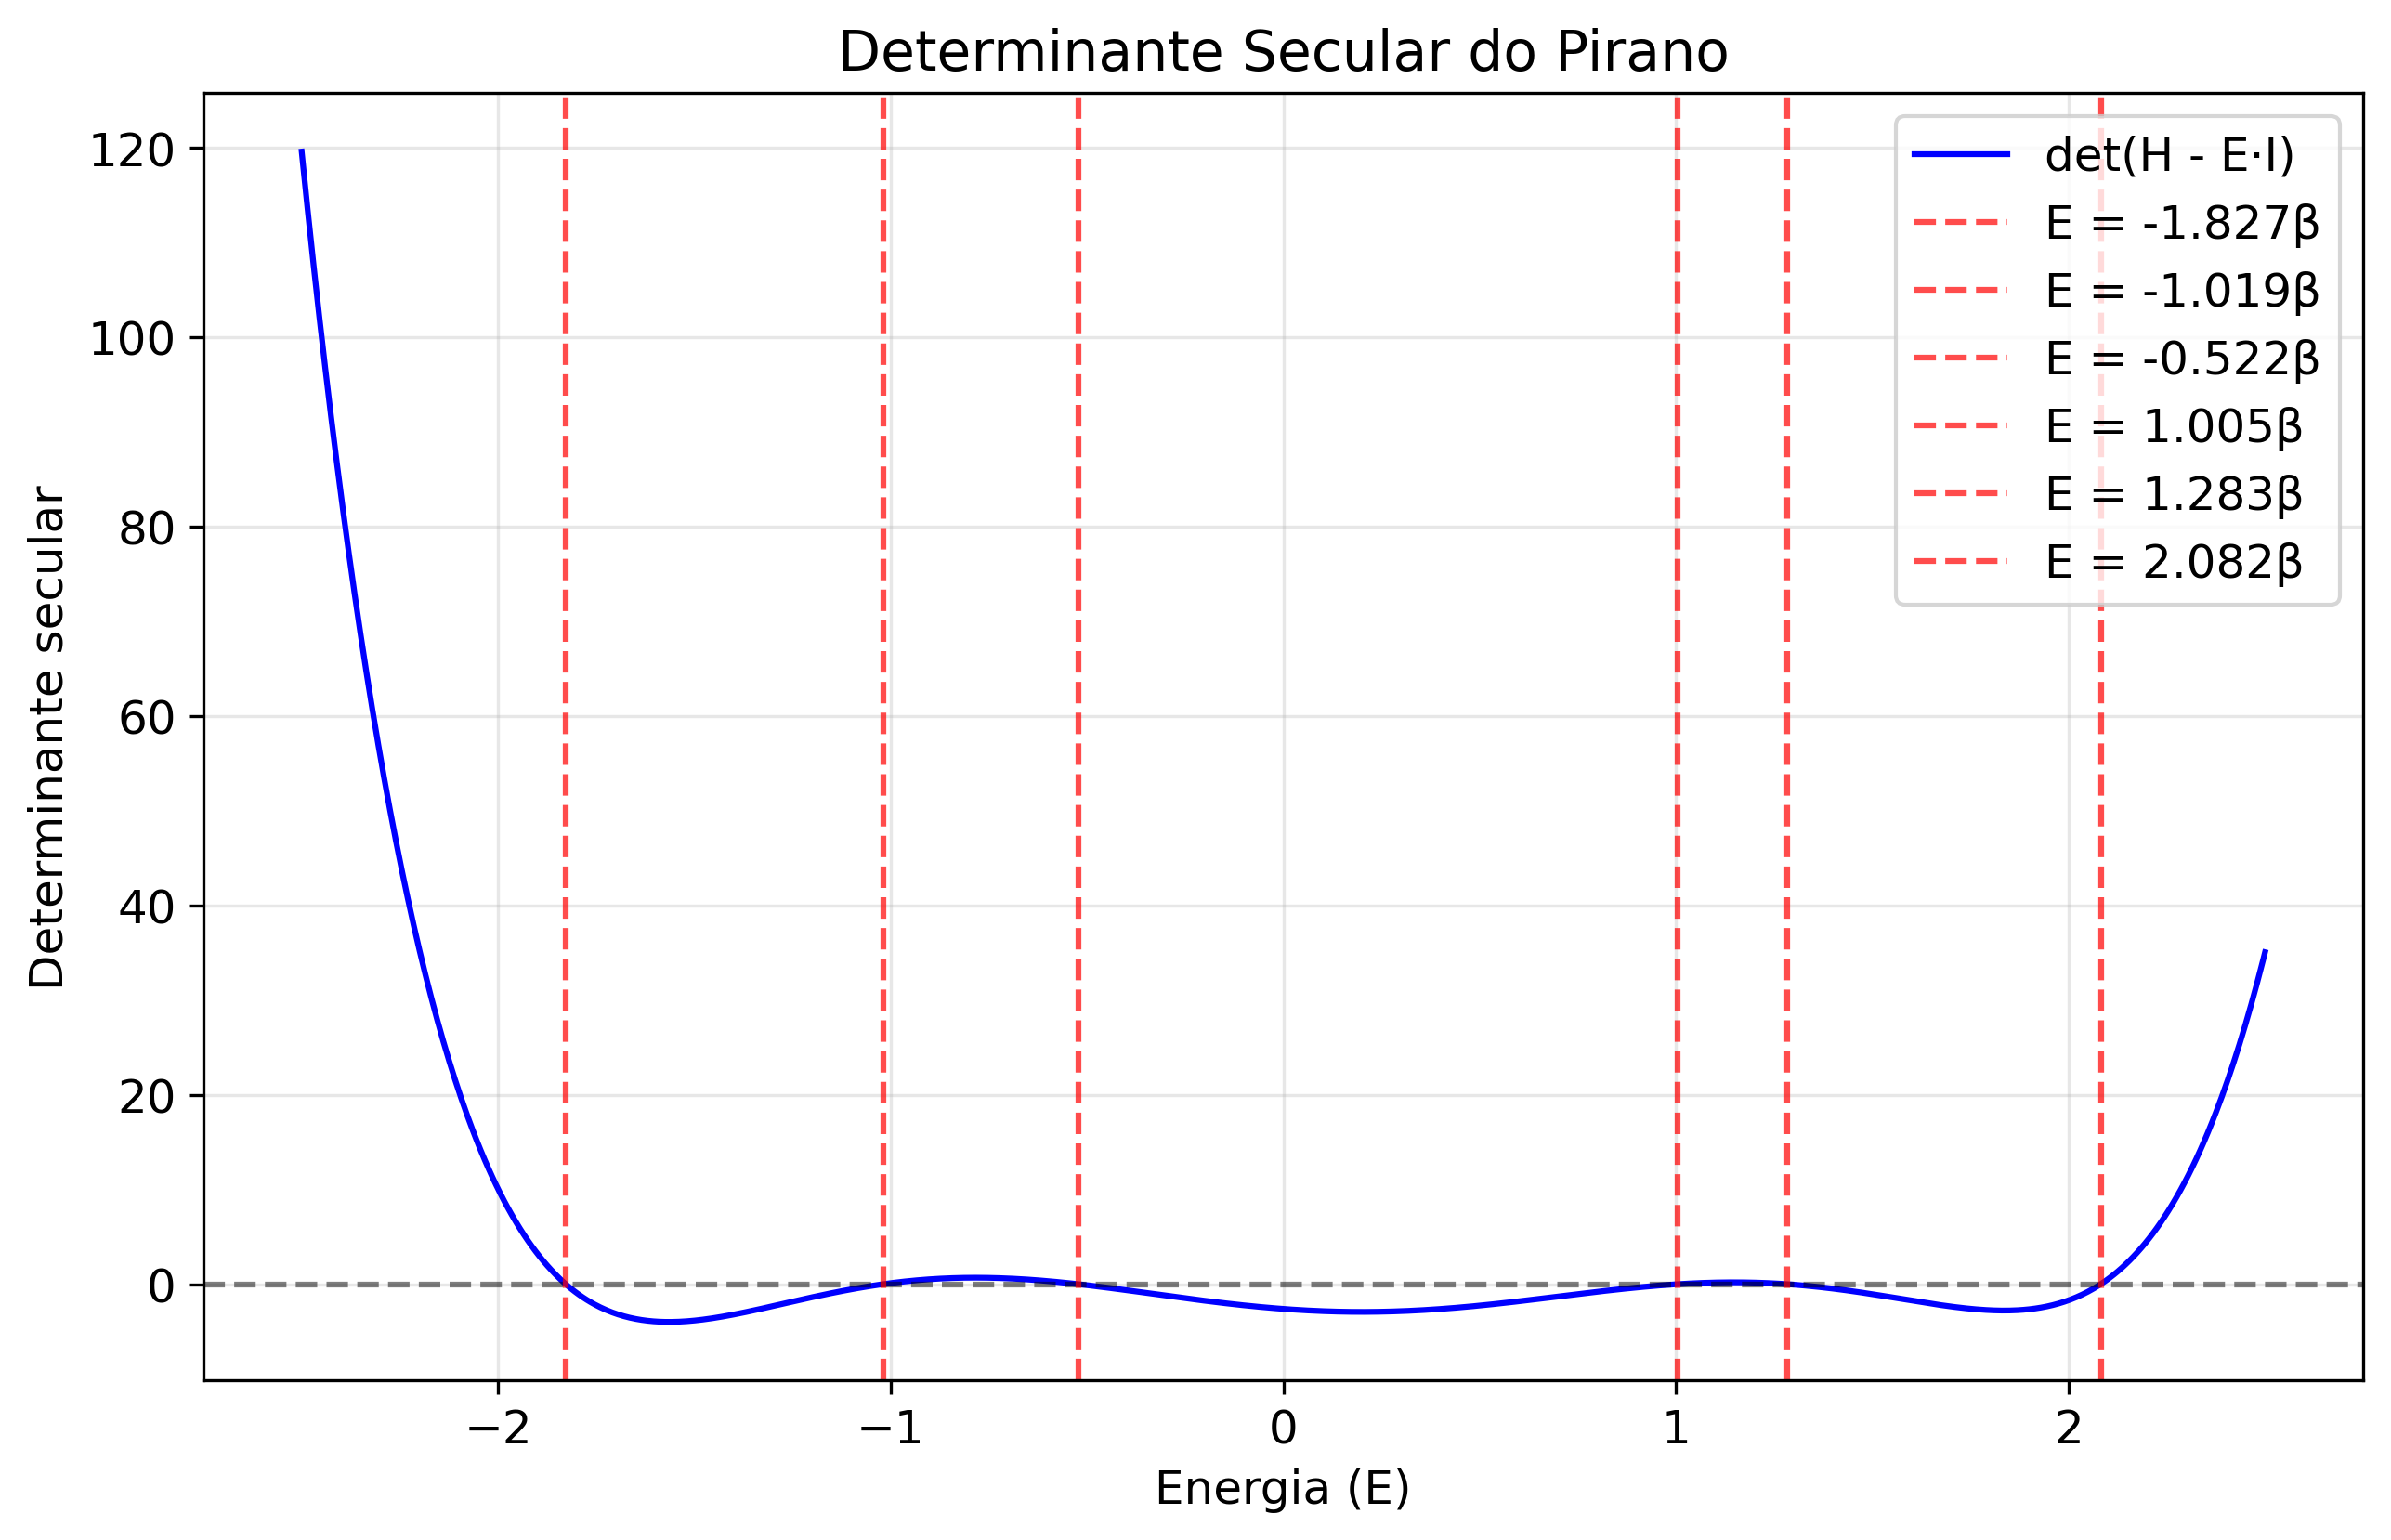

Tempo total de execução: 0.021001100540161133


In [339]:
# Função para calcular o determinante secular

def determinante_secular(E):
    """Calcula det(H - E·I) para um valor de E"""

    n = huckel_matrix.shape[0]
    
    return np.linalg.det(huckel_matrix - E * np.eye(n))

# Imprimir os valores obtidos pelo eigh
energias_eigh, orbitais_eigh = eigh(huckel_matrix)
print("Energias dos orbitais pelos autovalores:", energias_eigh)
inicio = time.time()
# Valores de E para avaliar o determinante
E_valores = np.linspace(-2.5, 2.5, 1000)
det_valores = [determinante_secular(E) for E in E_valores]

# Encontrar as raízes (onde o determinante muda de sinal)
raizes = []
for i in range(len(det_valores)-1):
    if det_valores[i] * det_valores[i+1] < 0:
        # Interpolação linear para estimar a raiz
        E_raiz = E_valores[i] - det_valores[i] * (E_valores[i+1] - E_valores[i]) / (det_valores[i+1] - det_valores[i])
        raizes.append(E_raiz)
fim = time.time()
print("Raízes do determinante secular (energias dos orbitais):")
for i, raiz in enumerate(raizes):
    print(f"E_{i+1} = {raiz:.3f} β")

# Visualização do determinante secular
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(E_valores, det_valores, 'b-', label='det(H - E·I)')
plt.axhline(0, color='k', linestyle='--', alpha=0.5)
for raiz in raizes:
    plt.axvline(raiz, color='r', linestyle='--', alpha=0.7, label=f'E = {raiz:.3f}β')

plt.xlabel('Energia (E)')
plt.ylabel('Determinante secular')
plt.title('Determinante Secular do Pirano')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('determinante_secular_pirano.png', dpi=300, bbox_inches='tight', 
        facecolor='white', edgecolor='white', 
        transparent=False)
plt.show()

print("Tempo total de execução:", fim - inicio)

O diagrama de níveis mostra os níveis de energia de cada orbital molecular (MO)

ocupação eletrônica: [2, 2, 2, 0, 0, 0]
homo:  -1.3061591671088058
lumo:  2.5122775288071497


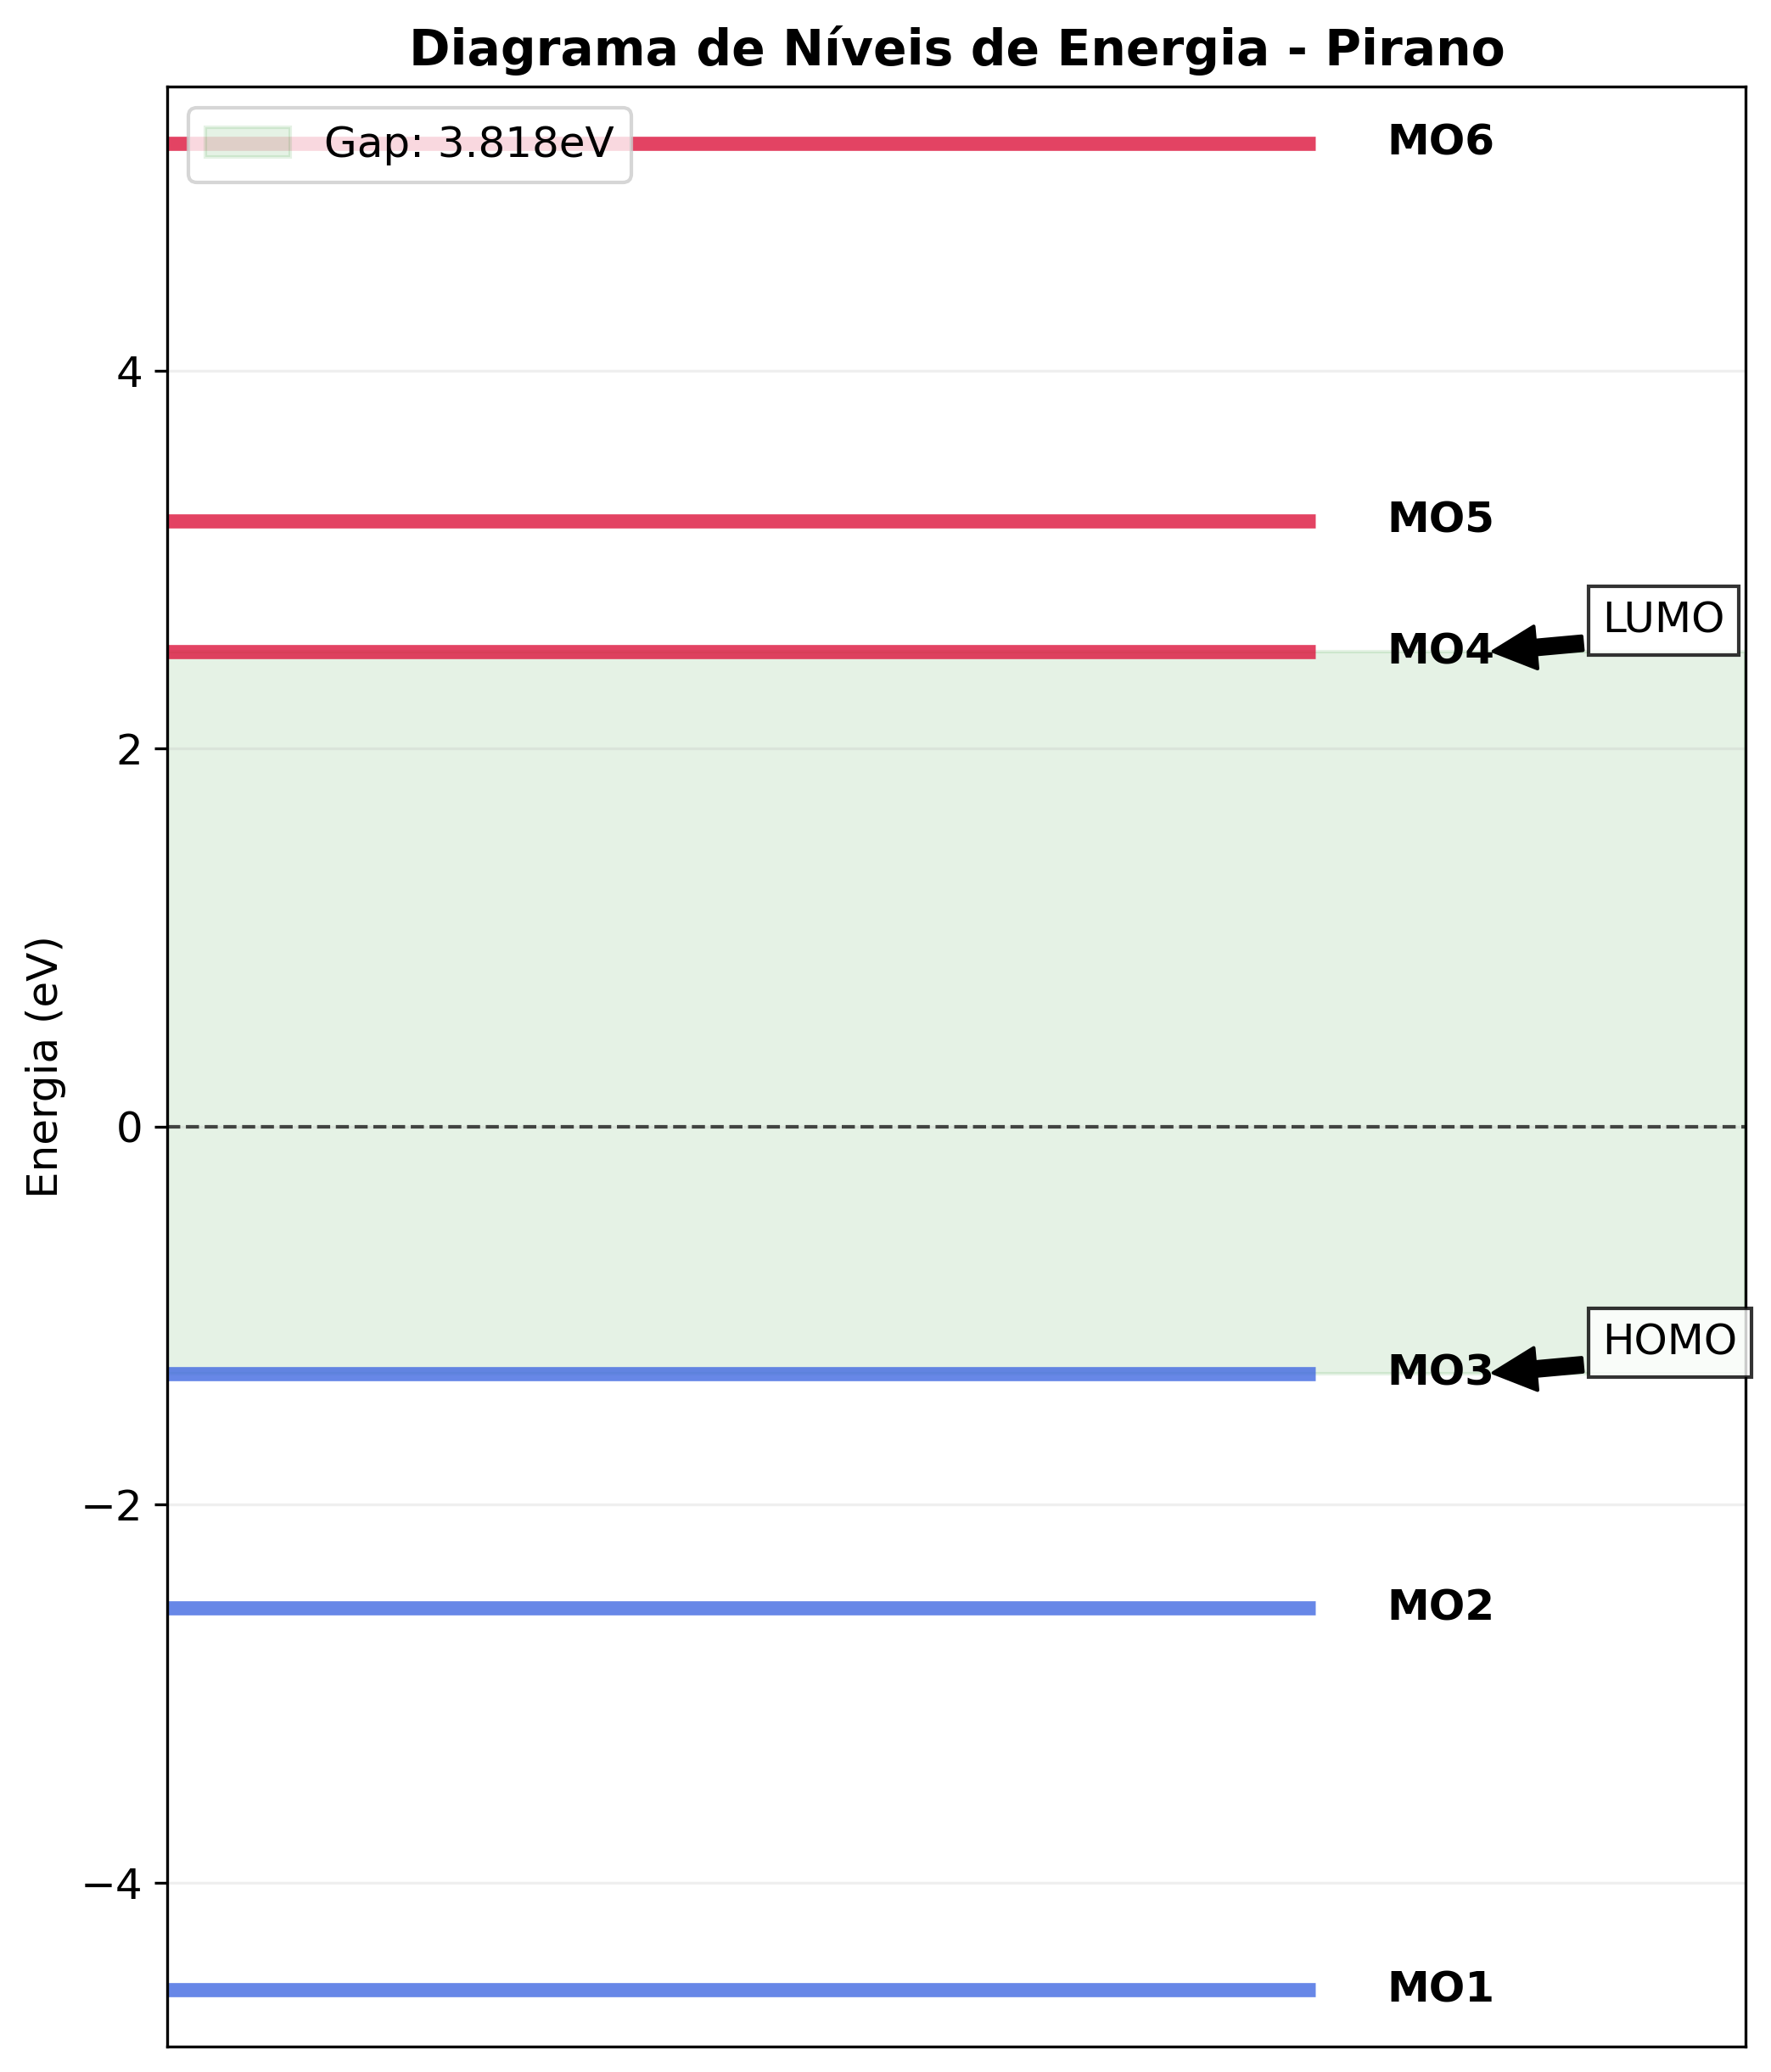

In [315]:
# Obter as energias e orbitais a partir dos autovalores e autovetores:
energias_eigh, orbitais = eigh(huckel_matrix)

# Converter as energias adimensionais para energias reais:
fator_conversao = 2.5  # Defina o fator de conversão apropriado
energias = energias_eigh * fator_conversao

n_eletrons = 6  # 4 elétrons de carbonos + 2 elétrons de oxigênio

# Determinar ocupação
ocupacao = [2 if i < n_eletrons//2 else 0 for i in range(len(energias))]
homo_naftaleno_idx = np.max(np.where(np.array(ocupacao) > 0))
lumo_naftaleno_idx = homo_naftaleno_idx + 1
gap = energias[lumo_naftaleno_idx] - energias[homo_naftaleno_idx]  # Correto: gap positivo
nome_molecula = "Pirano"

#Imprimir a ocupação eletrônica
print("ocupação eletrônica:", ocupacao)

# Imprimir energias do homo e lumo
print('homo: ', energias[homo_naftaleno_idx])
print('lumo: ', energias[lumo_naftaleno_idx])

# 1. DIAGRAMA DE NÍVEIS BÁSICO
"""Diagrama simples de níveis de energia"""
fig, ax = plt.subplots(figsize=(8, 10))

# Plotar os níveis de energia
for i, energia in enumerate(energias):
    color = 'royalblue' if ocupacao[i] > 0 else 'crimson'
    ax.hlines(energia, 0, 0.8, colors=color, lw=4, alpha=0.8)
    
    # Adicionar informações
    ax.text(0.85, energia, f'MO{i+1}', va='center', ha='left', fontweight='bold')

# Linha de energia zero e destaque do gap
ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, lw=1)
ax.axhspan(energias[homo_naftaleno_idx], energias[lumo_naftaleno_idx], alpha=0.1, color='green', 
            label=f'Gap: {gap:.3f}eV')

# Configurações do gráfico
ax.set_xlim(0, 1.1)
ax.set_ylim(min(energias)-0.3, max(energias)+0.3)
ax.set_title(f'Diagrama de Níveis de Energia - {nome_molecula}', fontsize=14, fontweight='bold')
ax.set_ylabel('Energia (eV)', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.2, axis='y')
ax.set_xticks([])  # Remover ticks do eixo x

# Exboçar o homo e o lumo
ax.annotate('HOMO', xy=(0.92, energias[homo_naftaleno_idx]), xytext=(1.0, energias[homo_naftaleno_idx]+0.1),
            arrowprops=dict(facecolor='black', shrink=0.05), bbox=dict(facecolor='white', alpha=0.8))
ax.annotate('LUMO', xy=(0.92, energias[lumo_naftaleno_idx]), xytext=(1.0, energias[lumo_naftaleno_idx]+0.1),
            arrowprops=dict(facecolor='black', shrink=0.05), bbox=dict(facecolor='white', alpha=0.8))

plt.plot()
plt.savefig(f'diagrama_niveis_{nome_molecula.lower()}.png', 
        facecolor='white', edgecolor='white', 
        transparent=False)  # ← IMPORTANTE: transparent=False

Os orbitais moleculares são as colunas da matriz de autovetores geradas pelo método de huckel

Cada coluna representa como cada orbital atômico contribui para a formação do orbital molecular:

In [316]:
# Imprimir os orbitais moleculares:

for i in range(len(orbitais)):
    print(f"MO_{i+1} =", orbitais[:, i])
print("")

print(orbitais)



MO_1 = [-0.19575801 -0.31624329 -0.46814201 -0.51900907 -0.48170246 -0.37563862]
MO_2 = [ 0.05571794 -0.41521677 -0.51978158 -0.14192412  0.47455217  0.55585559]
MO_3 = [-0.48222005 -0.58336495  0.08998783  0.52003985  0.1919059  -0.33433818]
MO_4 = [ 0.12434951 -0.49651953  0.44386481  0.00074812 -0.54333677  0.49575617]
MO_5 = [ 0.61279713 -0.07421629 -0.4389282   0.57258    -0.27962964 -0.14238351]
MO_6 = [ 0.57883936 -0.36773747  0.33600362 -0.33495861  0.3640433  -0.41483843]

[[-0.19575801  0.05571794 -0.48222005  0.12434951  0.61279713  0.57883936]
 [-0.31624329 -0.41521677 -0.58336495 -0.49651953 -0.07421629 -0.36773747]
 [-0.46814201 -0.51978158  0.08998783  0.44386481 -0.4389282   0.33600362]
 [-0.51900907 -0.14192412  0.52003985  0.00074812  0.57258    -0.33495861]
 [-0.48170246  0.47455217  0.1919059  -0.54333677 -0.27962964  0.3640433 ]
 [-0.37563862  0.55585559 -0.33433818  0.49575617 -0.14238351 -0.41483843]]


A ordem de ligação π mede o "grau de ligação" entre dois átomos devido aos elétrons π.

In [317]:
# Defina a ocupação correta para 6 elétrons (3 orbitais duplamente ocupados)
n_eletrons = 6
ocupacao = [2 if i < n_eletrons//2 else 0 for i in range(len(energias))]

# Função para calcular ordem de ligação
def calcular_ordem_ligacao(orbitais, ocupacao, i, j):
    ordem = 0.0
    for k in range(len(ocupacao)):
        if ocupacao[k] > 0:
            ordem += ocupacao[k] * orbitais[i, k] * orbitais[j, k]
    return ordem

# Ligações reais na molécula de pirano
ligacoes_reais = [
    (0, 1),  # O1-C2
    (0, 5),  # O1-C6
    (1, 2),  # C2-C3
    (2, 3),  # C3-C4
    (3, 4),  # C4-C5
    (4, 5)   # C5-C6
]

# Calcule e imprima as ordens de ligação
for (i, j) in ligacoes_reais:
    ordem = calcular_ordem_ligacao(orbitais, ocupacao, i, j)
    print(f'Ordem de ligação entre átomos {i+1} e {j+1}: {ordem:.3f}')

Ordem de ligação entre átomos 1 e 2: 0.640
Ordem de ligação entre átomos 1 e 6: 0.531
Ordem de ligação entre átomos 2 e 3: 0.623
Ordem de ligação entre átomos 3 e 4: 0.727
Ordem de ligação entre átomos 4 e 5: 0.565
Ordem de ligação entre átomos 5 e 6: 0.761


A população eletrônica π em um átomo indica quantos elétrons π estão associados a esse átomo.

In [318]:
def calcular_populacoes(orbitais, ocupacao):
    """Calcula populações atômicas"""
    n_atomos = orbitais.shape[0]
    populacoes = np.zeros(n_atomos)
    
    for i in range(n_atomos):  # Para cada átomo
        for k in range(len(ocupacao)):  # Para cada orbital
            if ocupacao[k] > 0:  # Somente orbitais ocupados
                populacoes[i] += ocupacao[k] * (orbitais[i, k] ** 2)
    
    return populacoes

# Para o pirano:
populacoes = calcular_populacoes(orbitais, ocupacao)
print("Populações atômicas:")
for i, pop in enumerate(populacoes):
    print(f"Átomo {i+1}: {pop:.3f}")

Populações atômicas:
Átomo 1: 0.548
Átomo 2: 1.225
Átomo 3: 0.995
Átomo 4: 1.120
Átomo 5: 0.988
Átomo 6: 1.124


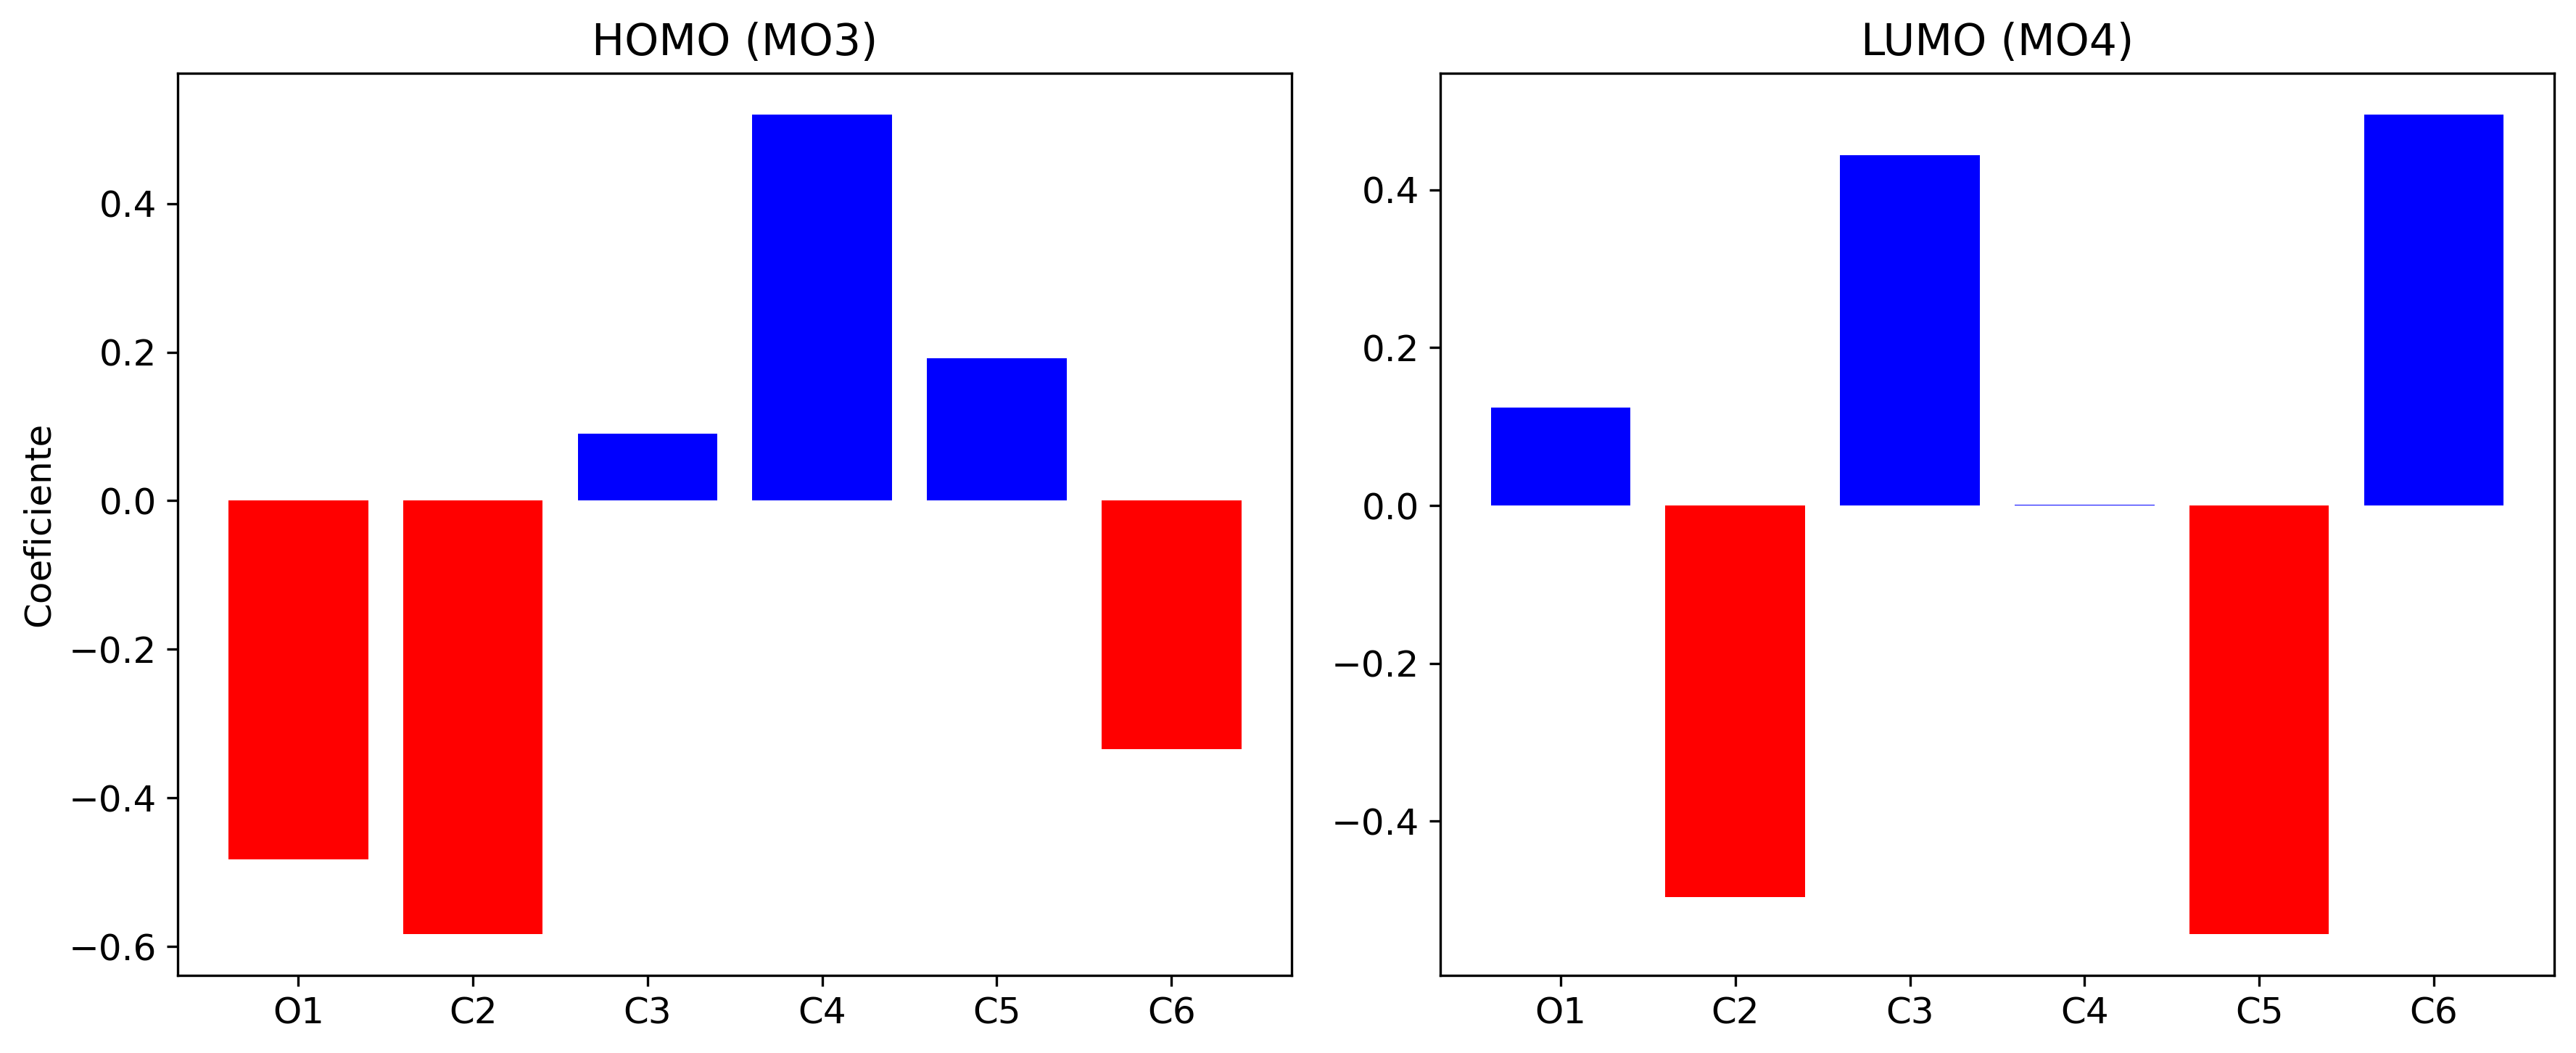

In [319]:
# Código adicional para esboçar HOMO e LUMO
def esbocar_orbitais_homo_lumo(orbitais, homo_idx, lumo_idx, atom_labels):
    """Esboça os orbitais HOMO e LUMO"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
    # HOMO
    homo = orbitais[:, homo_idx]
    ax1.bar(atom_labels, homo, color=['red' if x < 0 else 'blue' for x in homo])
    ax1.set_title(f'HOMO (MO{homo_idx+1})')
    ax1.set_ylabel('Coeficiente')
    
    # LUMO  
    lumo = orbitais[:, lumo_idx]
    ax2.bar(atom_labels, lumo, color=['red' if x < 0 else 'blue' for x in lumo])
    ax2.set_title(f'LUMO (MO{lumo_idx+1})')
    
    plt.tight_layout()
    plt.savefig('homo_lumo_esboco.png', dpi=300, 
        facecolor='white', edgecolor='white', 
        transparent=False) 
    plt.show()

# Usar:
esbocar_orbitais_homo_lumo(orbitais, homo_naftaleno_idx, lumo_naftaleno_idx, ['O1', 'C2', 'C3', 'C4', 'C5', 'C6'])

## Relatório:

# Exercício 2

### Obter as moléculas e enumerar os átomos:
#### Naftaleno
![alt text](numeracao_naftaleno_v2.jpg)
#### Quinolina
![alt text](numeracao_quinolina_v2.jpg)
#### Quinoxalina
![alt text](numeracao_quinoxalina_v2.jpg)

### Construir a Matriz de ligação:

In [320]:
martiz_conectividade = [[0,1,0,0,0,1,0,0,0,1],
                        [1,0,1,0,0,0,0,0,0,0],
                        [0,1,0,1,0,0,0,0,0,0],
                        [0,0,1,0,1,0,0,0,0,0],
                        [0,0,0,1,0,1,0,0,0,0],
                        [1,0,0,0,1,0,1,0,0,0],
                        [0,0,0,0,0,1,0,1,0,0],
                        [0,0,0,0,0,0,1,0,1,0],
                        [0,0,0,0,0,0,0,1,0,1],
                        [1,0,0,0,0,0,0,0,1,0],
                                               ]

### Parâmetros da matriz de huckel
Obtidos pelo slide do professor Pedro Alves da Silva Autreto

$$
H_{i,j} =
\begin{cases}
\alpha_i, & \text{se } i = j \\[6pt]
\beta_{ij}, & \text{se } i \text{ e } j \text{ estão ligados} \\[6pt]
0, & \text{caso contrário}
\end{cases}
$$

Cada átomo ou ligação vai usar os seguintes alphas e betas:

$\alpha_N = 0,5 \\
\alpha_C = 0 \\
\beta_{CN} = -1 \\
\beta_{CC} = -1 \\
$

In [321]:
#Parametros para gerar as matrizes:
alpha_N = 0.5
alpha_C = 0
beta_CN = -1
beta_CC = -1

In [322]:
import numpy as np

# Matriz do Naftaleno (já fornecida)
huckel_matrix_naftaleno = np.array([
    [0, -1, 0, 0, 0, -1, 0, 0, 0, -1],
    [-1, 0, -1, 0, 0, 0, 0, 0, 0, 0],
    [0, -1, 0, -1, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 0, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, 0, -1, 0, 0, 0, 0],
    [-1, 0, 0, 0, -1, 0, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, -1, 0, -1, 0, 0],
    [0, 0, 0, 0, 0, 0, -1, 0, -1, 0],
    [0, 0, 0, 0, 0, 0, 0, -1, 0, -1],
    [-1, 0, 0, 0, 0, 0, 0, 0, -1, 0]
])

# Matriz da Quinolina (COM modificação no elemento diagonal)
huckel_matrix_quinolina = np.array([
    [0, -1, 0, 0, 0, -1, 0, 0, 0, -1],
    [-1, 0, -1, 0, 0, 0, 0, 0, 0, 0],
    [0, -1, 0, -1, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 0, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, 0.5, -1, 0, 0, 0, 0],  # Elemento modificado
    [-1, 0, 0, 0, -1, 0, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, -1, 0, -1, 0, 0],
    [0, 0, 0, 0, 0, 0, -1, 0, -1, 0],
    [0, 0, 0, 0, 0, 0, 0, -1, 0, -1],
    [-1, 0, 0, 0, 0, 0, 0, 0, -1, 0]
])

# Matriz da Quinoxalina (COM modificações nos elementos diagonais)
huckel_matrix_quinoxalina = np.array([
    [0, -1, 0, 0, 0, -1, 0, 0, 0, -1],
    [-1, 0.5, -1, 0, 0, 0, 0, 0, 0, 0],  # Elemento modificado
    [0, -1, 0, -1, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 0, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, -1, 0.5, -1, 0, 0, 0, 0],  # Elemento modificado
    [-1, 0, 0, 0, -1, 0, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, -1, 0, -1, 0, 0],
    [0, 0, 0, 0, 0, 0, -1, 0, -1, 0],
    [0, 0, 0, 0, 0, 0, 0, -1, 0, -1],
    [-1, 0, 0, 0, 0, 0, 0, 0, -1, 0]
])

# Diagonalização das Matrizes
autovalores_naftaleno, autovetores_naftaleno = np.linalg.eig(huckel_matrix_naftaleno)
autovalores_quinolina, autovetores_quinolina = np.linalg.eig(huckel_matrix_quinolina)
autovalores_quinoxalina, autovetores_quinoxalina = np.linalg.eig(huckel_matrix_quinoxalina)

# Ordenar autovalores
autovalores_naftaleno = np.sort(autovalores_naftaleno)
autovalores_quinolina = np.sort(autovalores_quinolina)
autovalores_quinoxalina = np.sort(autovalores_quinoxalina)

print("Autovalores do Naftaleno:")
print(autovalores_naftaleno)
print("\nAutovalores da Quinolina:")
print(autovalores_quinolina)
print("\nAutovalores da Quinoxalina:")
print(autovalores_quinoxalina)

Autovalores do Naftaleno:
[-2.30277564 -1.61803399 -1.30277564 -1.         -0.61803399  0.61803399
  1.          1.30277564  1.61803399  2.30277564]

Autovalores da Quinolina:
[-2.26702562 -1.593263   -1.23156942 -1.         -0.52709707  0.70328324
  1.          1.38421965  1.66892754  2.36252467]

Autovalores da Quinoxalina:
[-2.22884756 -1.55024793 -1.18614066 -1.         -0.41421356  0.76416009
  1.          1.5149354   1.68614066  2.41421356]


ocupação eletrônica: [2, 2, 2, 2, 2, 0, 0, 0, 0, 0]
homo:  -1.5450849718747375
lumo:  1.545084971874737


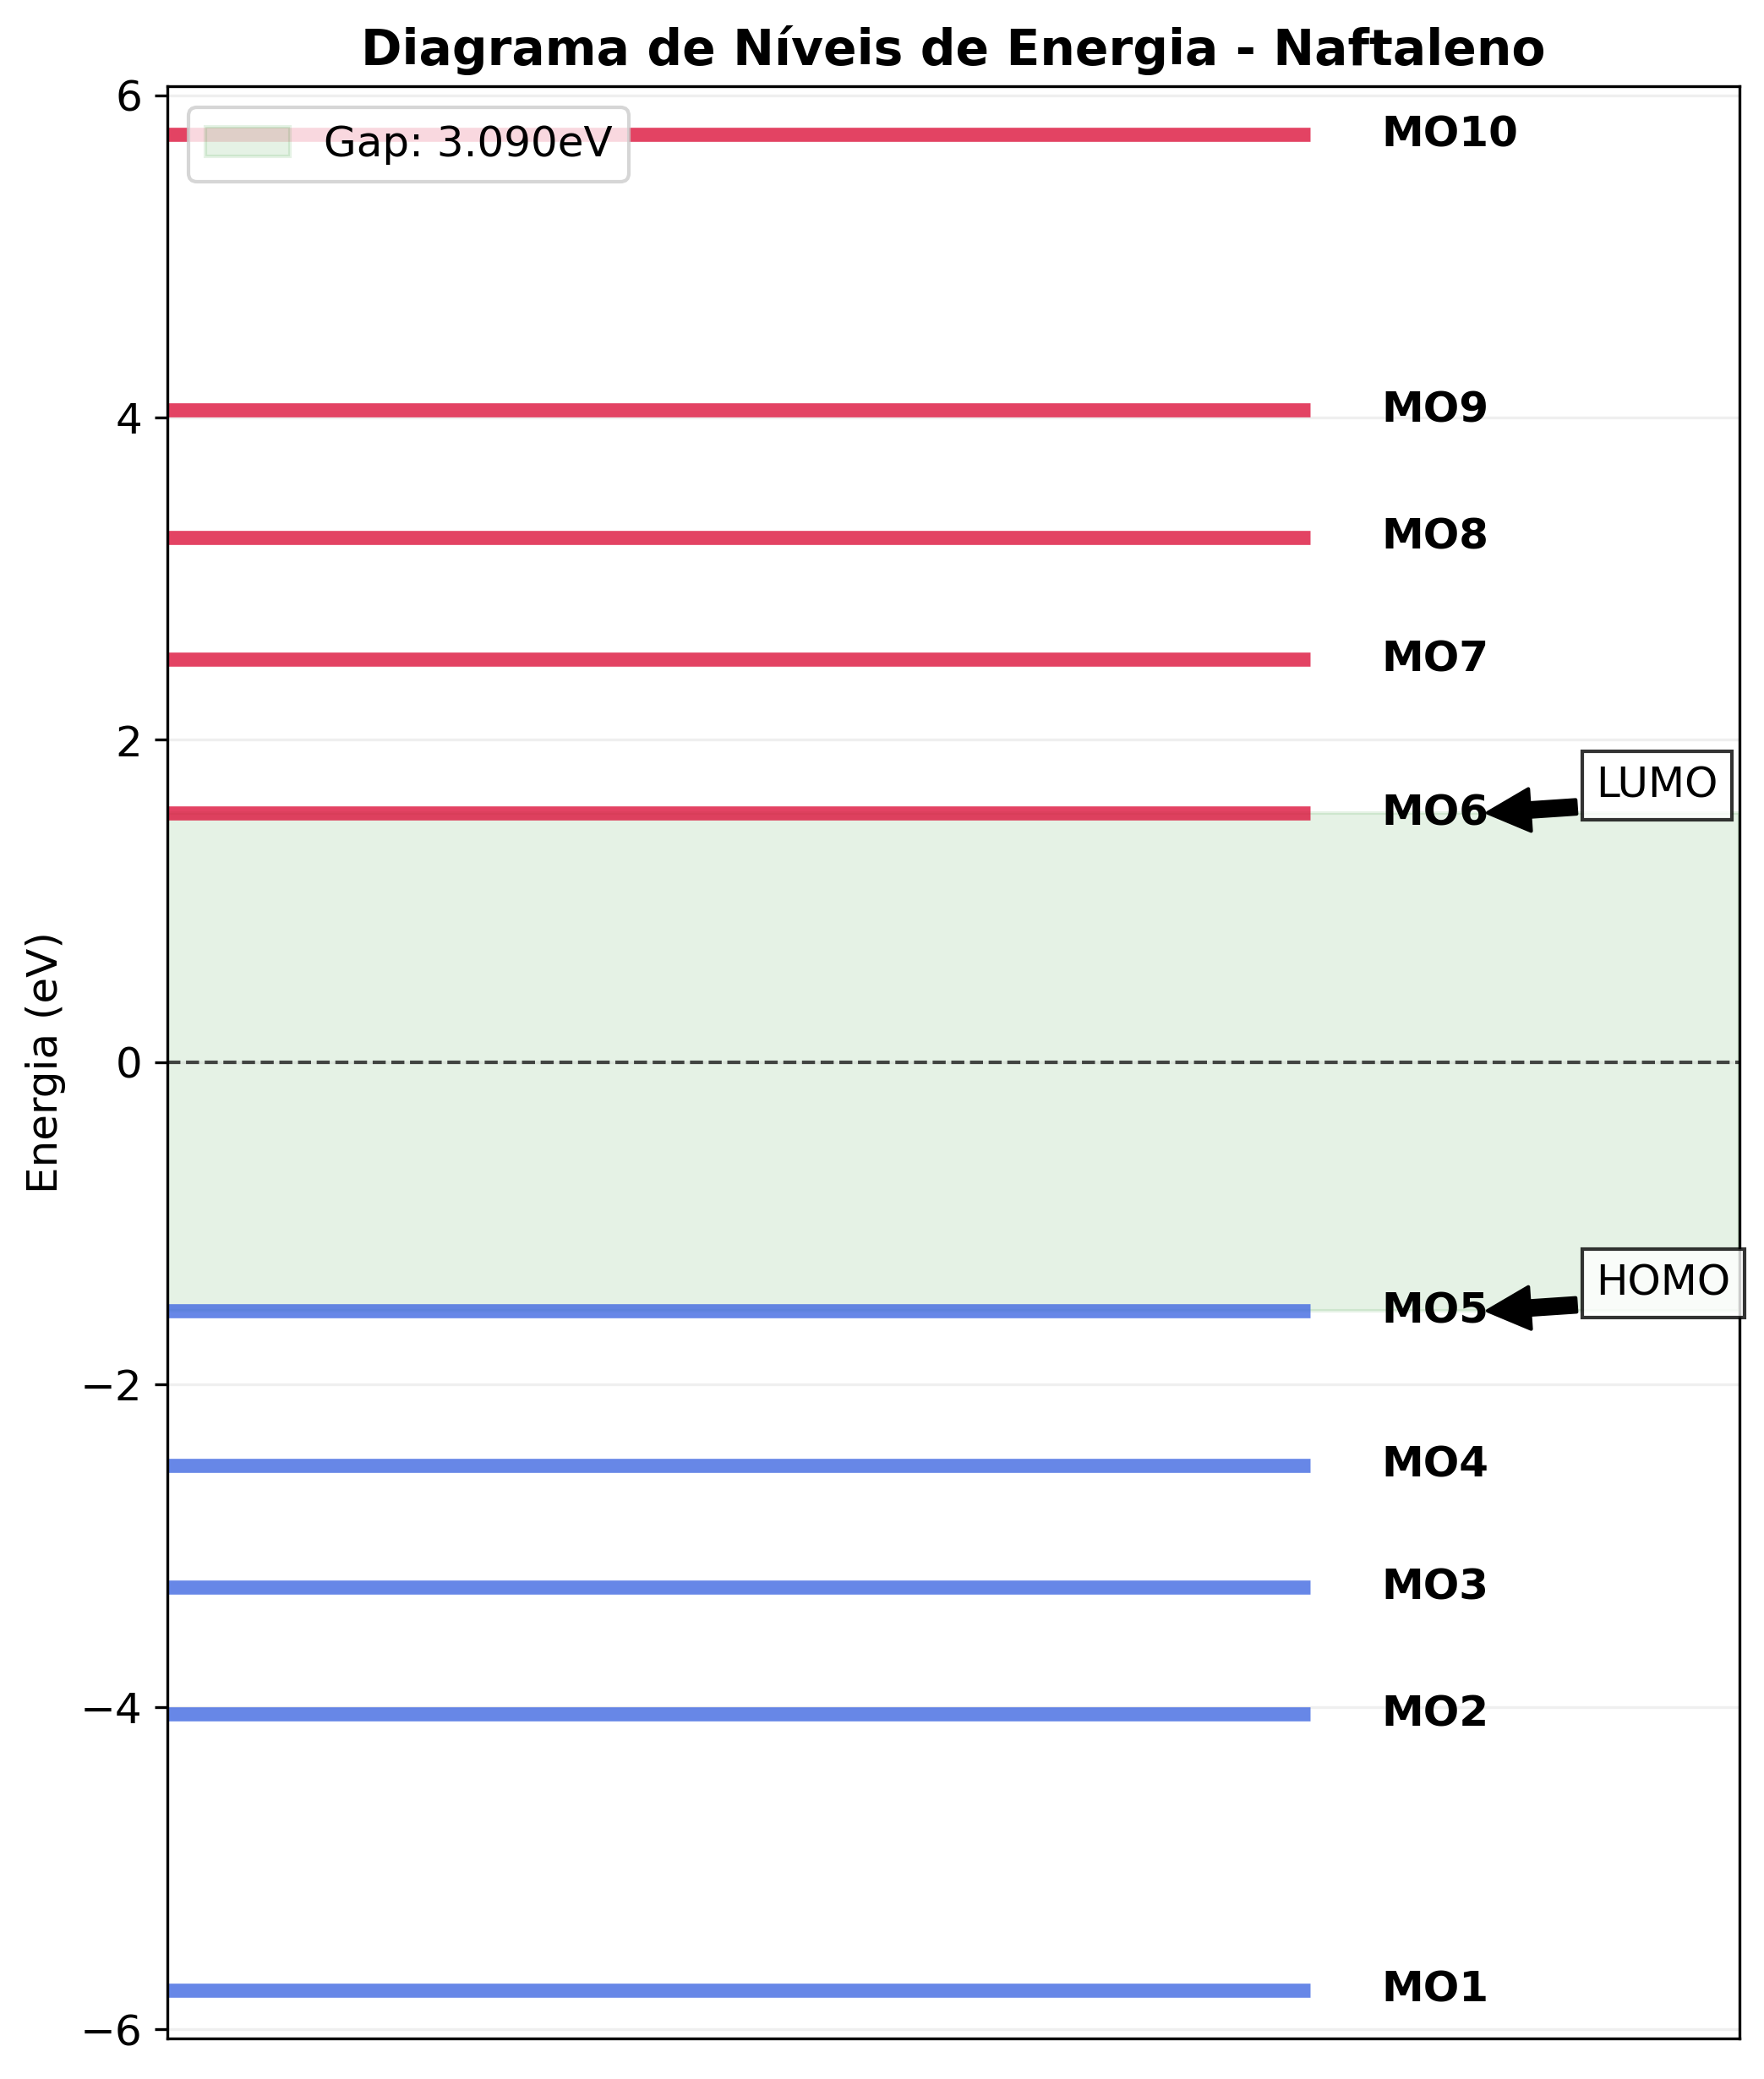

In [323]:
#Naftaleno

# Converter as energias adimensionais para energias reais:
fator_conversao = 2.5  # Defina o fator de conversão apropriado
energias = autovalores_naftaleno* fator_conversao
energias = np.sort(energias)

n_eletrons = 10  

# Determinar ocupação
ocupacao = [2 if i < n_eletrons//2 else 0 for i in range(len(energias))]
homo_naftaleno_idx = np.max(np.where(np.array(ocupacao) > 0))
lumo_naftaleno_idx = homo_naftaleno_idx + 1
gap = energias[lumo_naftaleno_idx] - energias[homo_naftaleno_idx]  
nome_molecula = "Naftaleno"

#Imprimir a ocupação eletrônica
print("ocupação eletrônica:", ocupacao)

# Imprimir energias do homo e lumo
print('homo: ', energias[homo_naftaleno_idx])
print('lumo: ', energias[lumo_naftaleno_idx])

# 1. DIAGRAMA DE NÍVEIS BÁSICO
"""Diagrama simples de níveis de energia"""
fig, ax = plt.subplots(figsize=(8, 10))

# Plotar os níveis de energia
for i, energia in enumerate(energias):
    color = 'royalblue' if ocupacao[i] > 0 else 'crimson'
    ax.hlines(energia, 0, 0.8, colors=color, lw=4, alpha=0.8)
    
    # Adicionar informações
    ax.text(0.85, energia, f'MO{i+1}', va='center', ha='left', fontweight='bold')

# Linha de energia zero e destaque do gap
ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, lw=1)
ax.axhspan(energias[homo_naftaleno_idx], energias[lumo_naftaleno_idx], alpha=0.1, color='green', 
            label=f'Gap: {gap:.3f}eV')

# Configurações do gráfico
ax.set_xlim(0, 1.1)
ax.set_ylim(min(energias)-0.3, max(energias)+0.3)
ax.set_title(f'Diagrama de Níveis de Energia - {nome_molecula}', fontsize=14, fontweight='bold')
ax.set_ylabel('Energia (eV)', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.2, axis='y')
ax.set_xticks([])  # Remover ticks do eixo x

# Exboçar o homo e o lumo
ax.annotate('HOMO', xy=(0.92, energias[homo_naftaleno_idx]), xytext=(1.0, energias[homo_naftaleno_idx]+0.1),
            arrowprops=dict(facecolor='black', shrink=0.05), bbox=dict(facecolor='white', alpha=0.8))
ax.annotate('LUMO', xy=(0.92, energias[lumo_naftaleno_idx]), xytext=(1.0, energias[lumo_naftaleno_idx]+0.1),
            arrowprops=dict(facecolor='black', shrink=0.05), bbox=dict(facecolor='white', alpha=0.8))

plt.plot()
plt.savefig(f'diagrama_niveis_{nome_molecula.lower()}.png', 
        facecolor='white', edgecolor='white', 
        transparent=False)  # ← IMPORTANTE: transparent=False

ocupação eletrônica: [2, 2, 2, 2, 2, 0, 0, 0, 0, 0]
homo:  -1.3177426867036046
lumo:  1.758208094518522


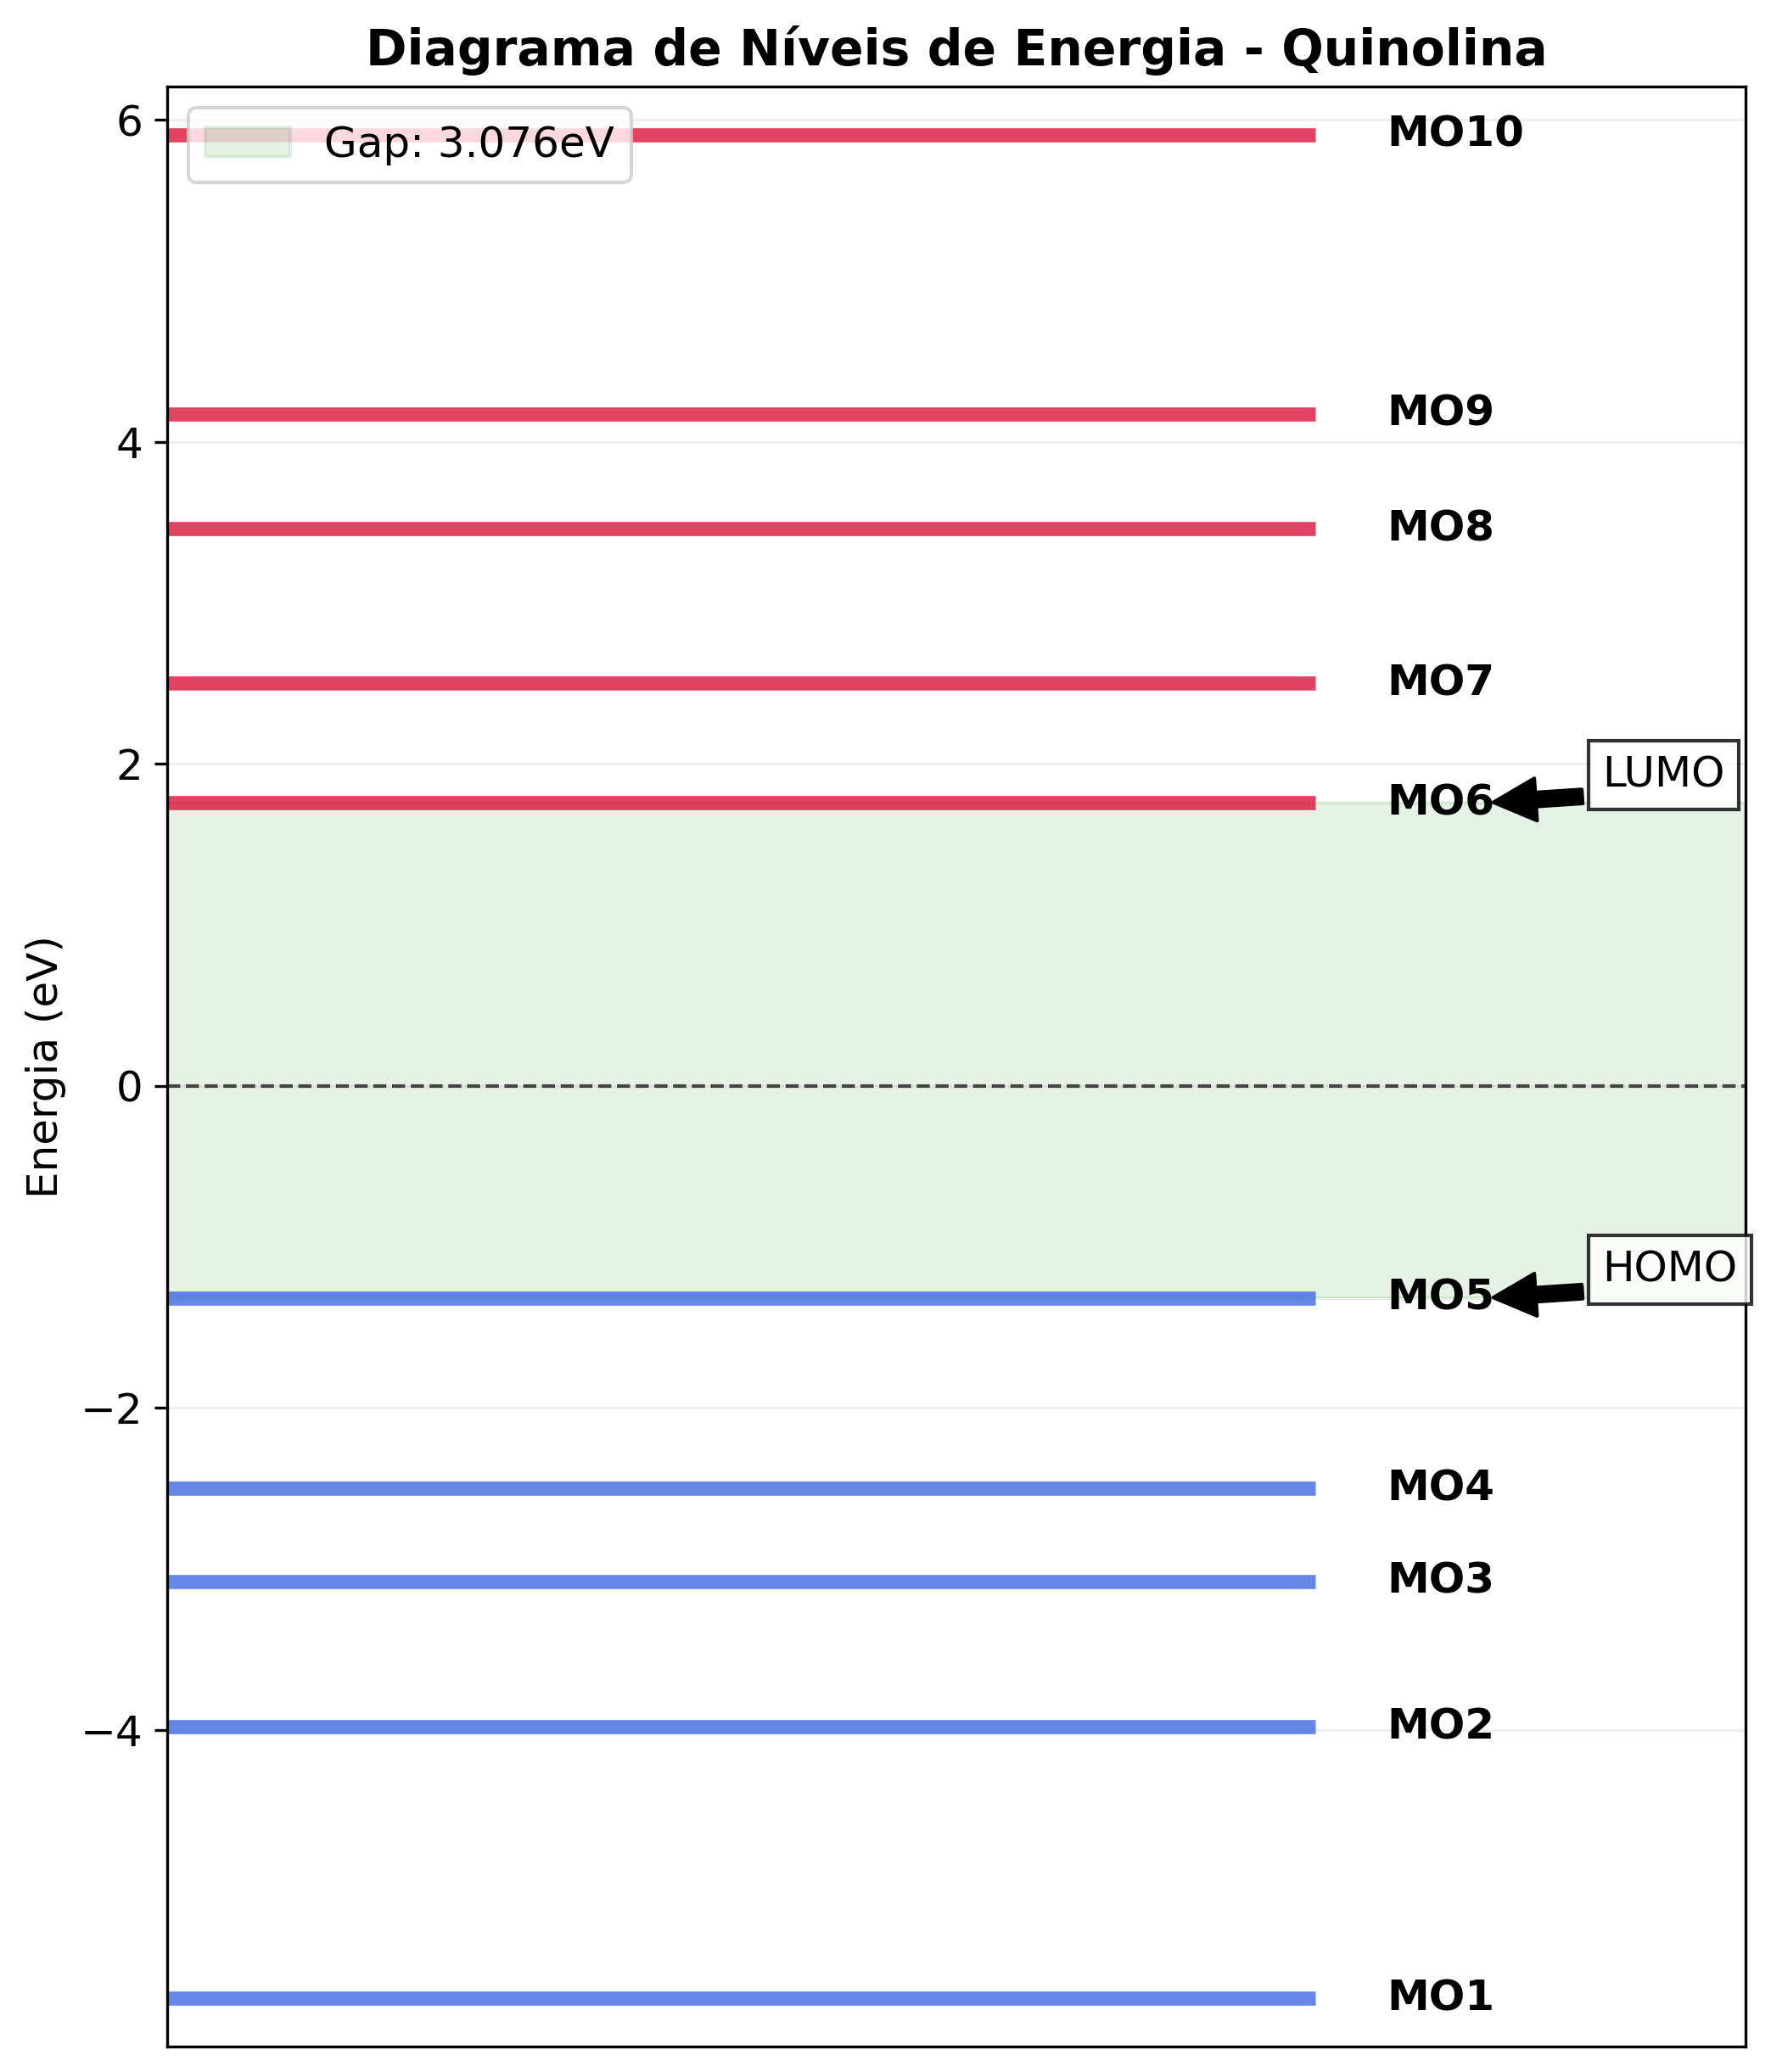

In [324]:
#quinolina
# Converter as energias adimensionais para energias reais:
fator_conversao = 2.5  # Defina o fator de conversão apropriado
energias = autovalores_quinolina* fator_conversao
energias = np.sort(energias)

n_eletrons = 10  

# Determinar ocupação
ocupacao = [2 if i < n_eletrons//2 else 0 for i in range(len(energias))]
homo_quinolina_idx = np.max(np.where(np.array(ocupacao) > 0))
lumo_quinolina_idx = homo_quinolina_idx + 1
gap = energias[lumo_quinolina_idx] - energias[homo_quinolina_idx]  
nome_molecula = "Quinolina"

#Imprimir a ocupação eletrônica
print("ocupação eletrônica:", ocupacao)

# Imprimir energias do homo e lumo
print('homo: ', energias[homo_quinolina_idx])
print('lumo: ', energias[lumo_quinolina_idx])

# 1. DIAGRAMA DE NÍVEIS BÁSICO
"""Diagrama simples de níveis de energia"""
fig, ax = plt.subplots(figsize=(8, 10))

# Plotar os níveis de energia
for i, energia in enumerate(energias):
    color = 'royalblue' if ocupacao[i] > 0 else 'crimson'
    ax.hlines(energia, 0, 0.8, colors=color, lw=4, alpha=0.8)
    
    # Adicionar informações
    ax.text(0.85, energia, f'MO{i+1}', va='center', ha='left', fontweight='bold')

# Linha de energia zero e destaque do gap
ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, lw=1)
ax.axhspan(energias[homo_quinolina_idx], energias[lumo_quinolina_idx], alpha=0.1, color='green', 
            label=f'Gap: {gap:.3f}eV')

# Configurações do gráfico
ax.set_xlim(0, 1.1)
ax.set_ylim(min(energias)-0.3, max(energias)+0.3)
ax.set_title(f'Diagrama de Níveis de Energia - {nome_molecula}', fontsize=14, fontweight='bold')
ax.set_ylabel('Energia (eV)', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.2, axis='y')
ax.set_xticks([])  # Remover ticks do eixo x

# Exboçar o homo e o lumo
ax.annotate('HOMO', xy=(0.92, energias[homo_quinolina_idx]), xytext=(1.0, energias[homo_quinolina_idx]+0.1),
            arrowprops=dict(facecolor='black', shrink=0.05), bbox=dict(facecolor='white', alpha=0.8))
ax.annotate('LUMO', xy=(0.92, energias[lumo_quinolina_idx]), xytext=(1.0, energias[lumo_quinolina_idx]+0.1),
            arrowprops=dict(facecolor='black', shrink=0.05), bbox=dict(facecolor='white', alpha=0.8))

plt.plot()
plt.savefig(f'diagrama_niveis_{nome_molecula.lower()}.png', 
        facecolor='white', edgecolor='white', 
        transparent=False)  # ← IMPORTANTE: transparent=False

ocupação eletrônica: [2, 2, 2, 2, 2, 0, 0, 0, 0, 0]
homo:  -1.035533905932736
lumo:  1.9104002195971612


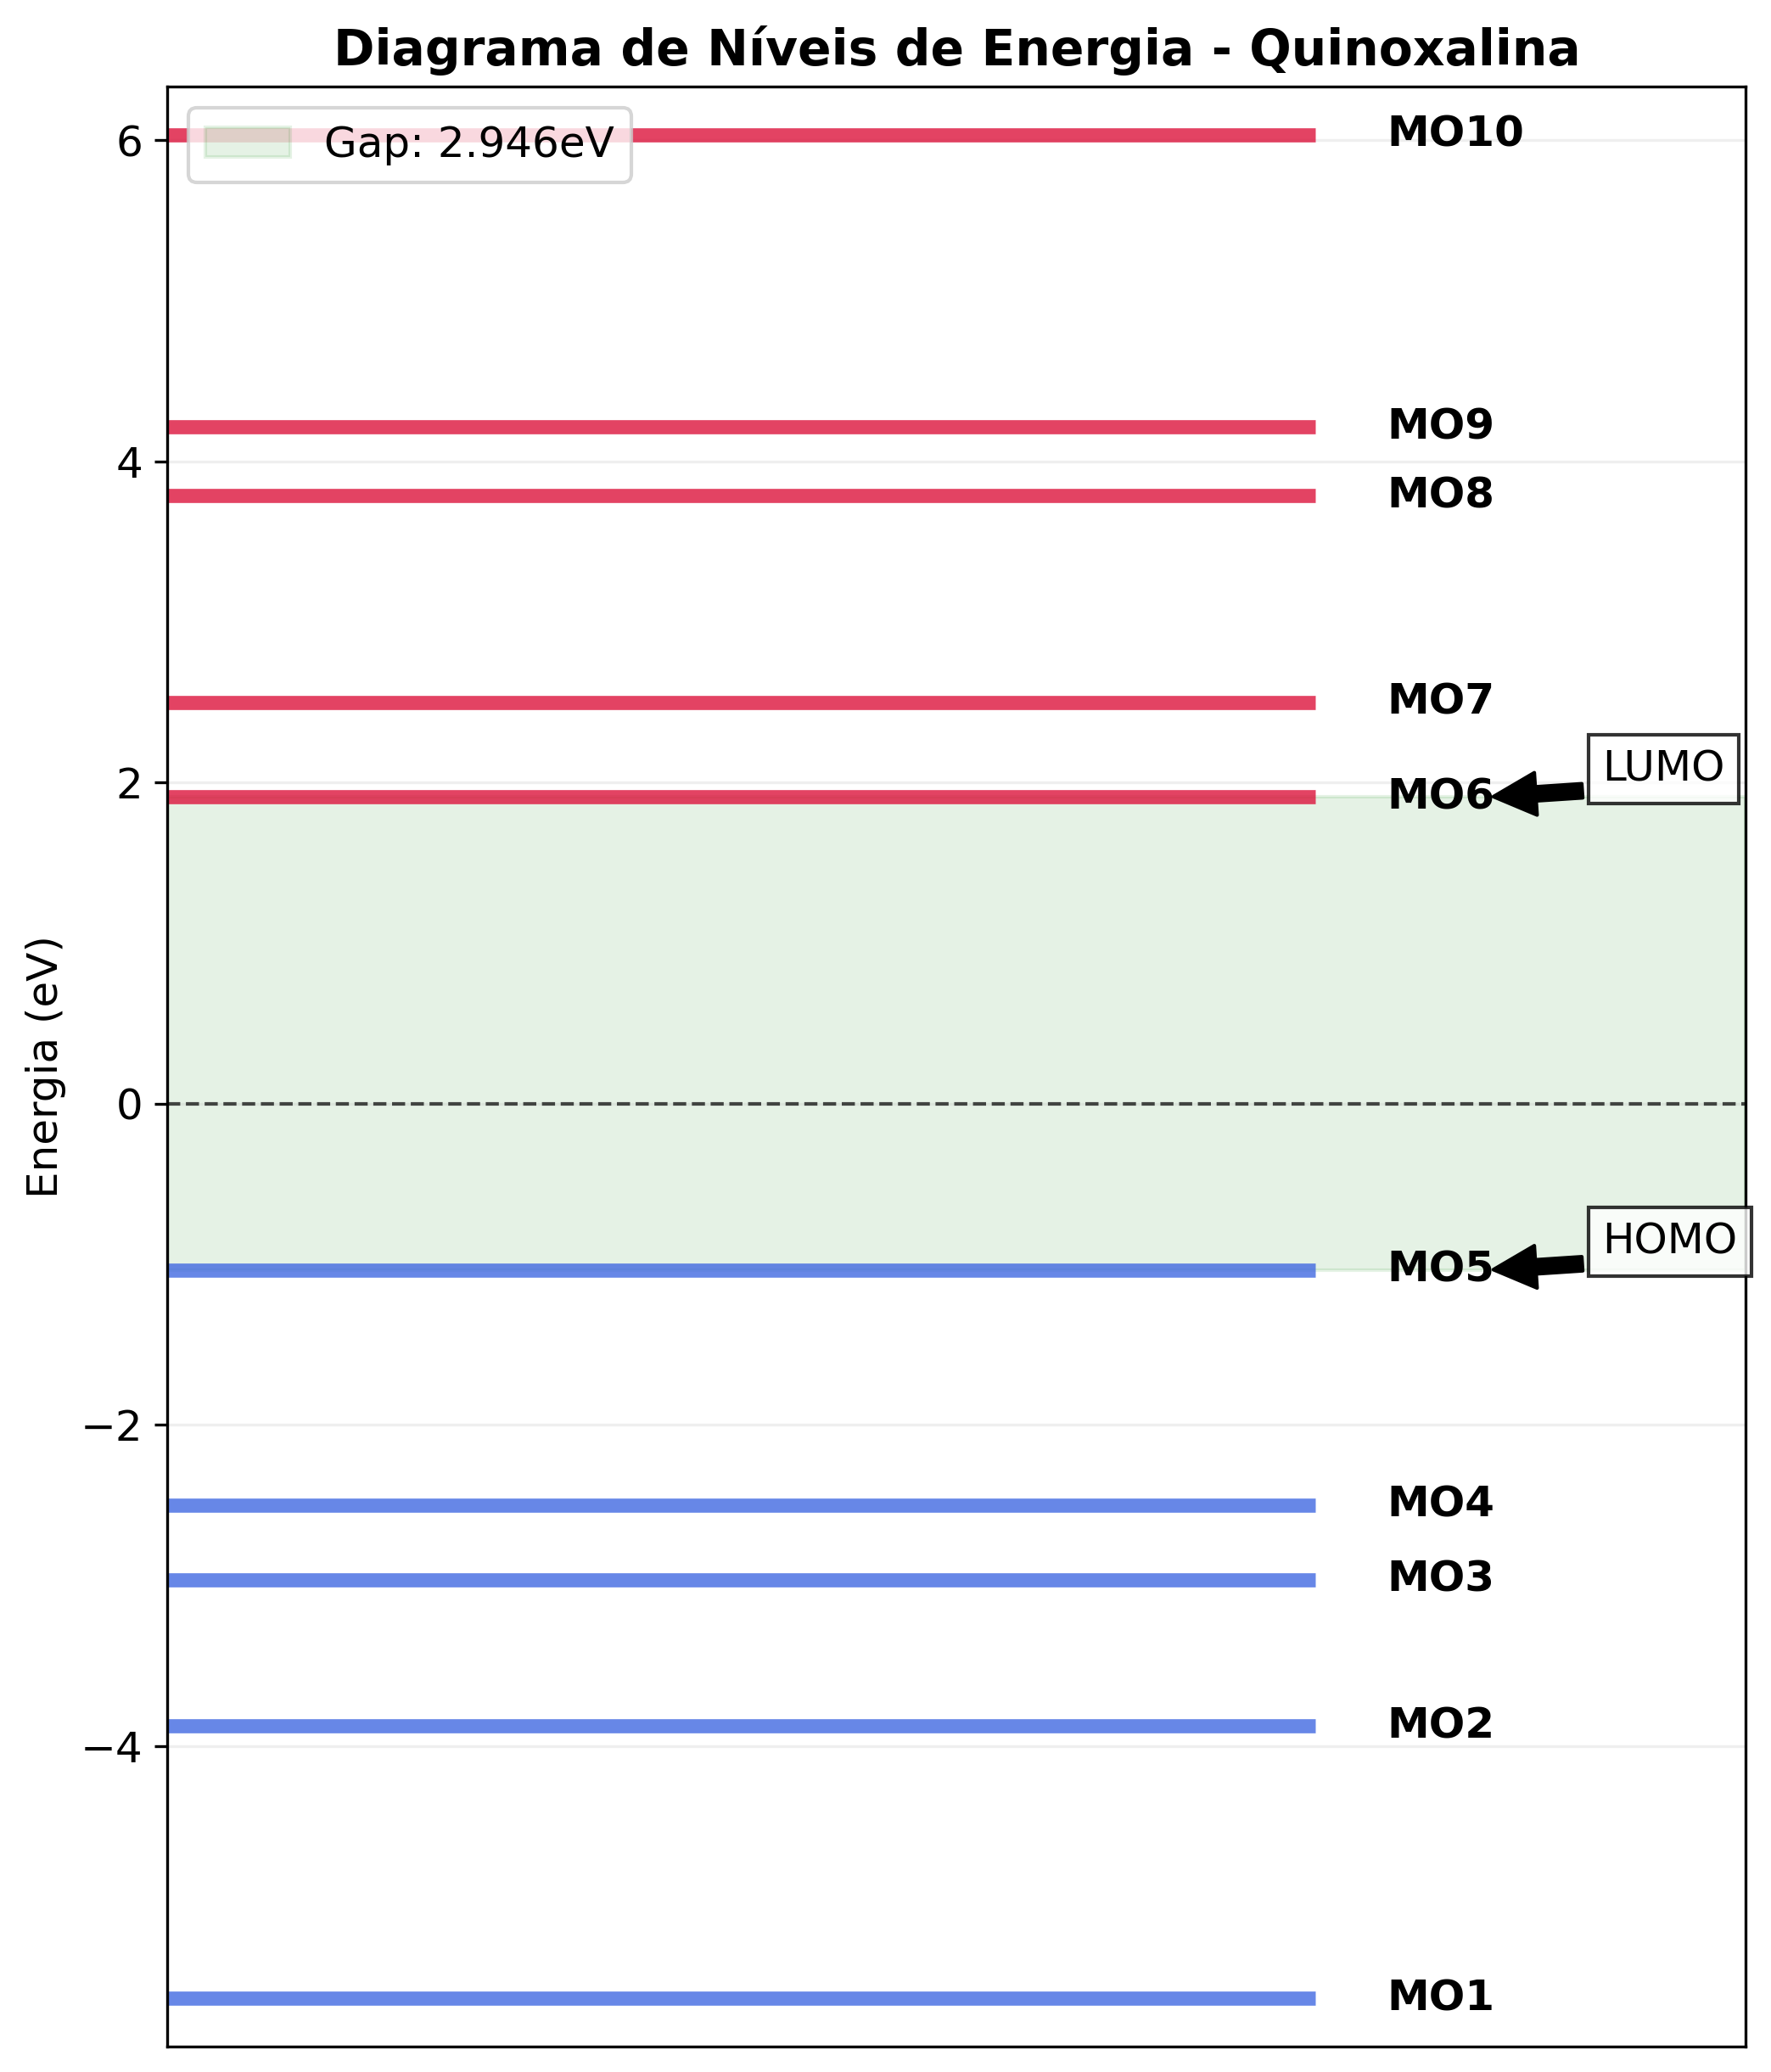

In [325]:
#Quinoxalina

# Converter as energias adimensionais para energias reais:
fator_conversao = 2.5  # Defina o fator de conversão apropriado
energias = autovalores_quinoxalina* fator_conversao
energias = np.sort(energias)

n_eletrons = 10  

# Determinar ocupação
ocupacao = [2 if i < n_eletrons//2 else 0 for i in range(len(energias))]
homo_quinoxalina_idx = np.max(np.where(np.array(ocupacao) > 0))
lumo_quinoxalina_idx = homo_quinoxalina_idx + 1
gap = energias[lumo_quinoxalina_idx] - energias[homo_quinoxalina_idx]  
nome_molecula = "Quinoxalina"

#Imprimir a ocupação eletrônica
print("ocupação eletrônica:", ocupacao)

# Imprimir energias do homo e lumo
print('homo: ', energias[homo_quinoxalina_idx])
print('lumo: ', energias[lumo_quinoxalina_idx])

# 1. DIAGRAMA DE NÍVEIS BÁSICO
"""Diagrama simples de níveis de energia"""
fig, ax = plt.subplots(figsize=(8, 10))

# Plotar os níveis de energia
for i, energia in enumerate(energias):
    color = 'royalblue' if ocupacao[i] > 0 else 'crimson'
    ax.hlines(energia, 0, 0.8, colors=color, lw=4, alpha=0.8)
    
    # Adicionar informações
    ax.text(0.85, energia, f'MO{i+1}', va='center', ha='left', fontweight='bold')

# Linha de energia zero e destaque do gap
ax.axhline(y=0, color='black', linestyle='--', alpha=0.7, lw=1)
ax.axhspan(energias[homo_quinoxalina_idx], energias[lumo_quinoxalina_idx], alpha=0.1, color='green', 
            label=f'Gap: {gap:.3f}eV')

# Configurações do gráfico
ax.set_xlim(0, 1.1)
ax.set_ylim(min(energias)-0.3, max(energias)+0.3)
ax.set_title(f'Diagrama de Níveis de Energia - {nome_molecula}', fontsize=14, fontweight='bold')
ax.set_ylabel('Energia (eV)', fontsize=12)
ax.legend(loc='upper left')
ax.grid(True, alpha=0.2, axis='y')
ax.set_xticks([])  # Remover ticks do eixo x

# Exboçar o homo e o lumo
ax.annotate('HOMO', xy=(0.92, energias[homo_quinoxalina_idx]), xytext=(1.0, energias[homo_quinoxalina_idx]+0.1),
            arrowprops=dict(facecolor='black', shrink=0.05), bbox=dict(facecolor='white', alpha=0.8))
ax.annotate('LUMO', xy=(0.92, energias[lumo_quinoxalina_idx]), xytext=(1.0, energias[lumo_quinoxalina_idx]+0.1),
            arrowprops=dict(facecolor='black', shrink=0.05), bbox=dict(facecolor='white', alpha=0.8))

plt.plot()
plt.savefig(f'diagrama_niveis_{nome_molecula.lower()}.png', 
        facecolor='white', edgecolor='white', 
        transparent=False)  # ← IMPORTANTE: transparent=False

### Populações eletronicas

Populações eletrônicas - Naftaleno:
Átomo 1: 1.000
Átomo 2: 1.000
Átomo 3: 1.000
Átomo 4: 1.000
Átomo 5: 1.000
Átomo 6: 1.000
Átomo 7: 1.000
Átomo 8: 1.000
Átomo 9: 1.000
Átomo 10: 1.000

Populações eletrônicas - Quinolina:
Átomo 1: 0.998
Átomo 2: 1.068
Átomo 3: 0.991
Átomo 4: 1.104
Átomo 5: 0.784
Átomo 6: 1.043
Átomo 7: 0.987
Átomo 8: 1.016
Átomo 9: 0.997
Átomo 10: 1.011

Populações eletrônicas - Quinoxalina:
Átomo 1: 1.042
Átomo 2: 0.849
Átomo 3: 1.097
Átomo 4: 1.097
Átomo 5: 0.849
Átomo 6: 1.042
Átomo 7: 0.998
Átomo 8: 1.013
Átomo 9: 1.013
Átomo 10: 0.998


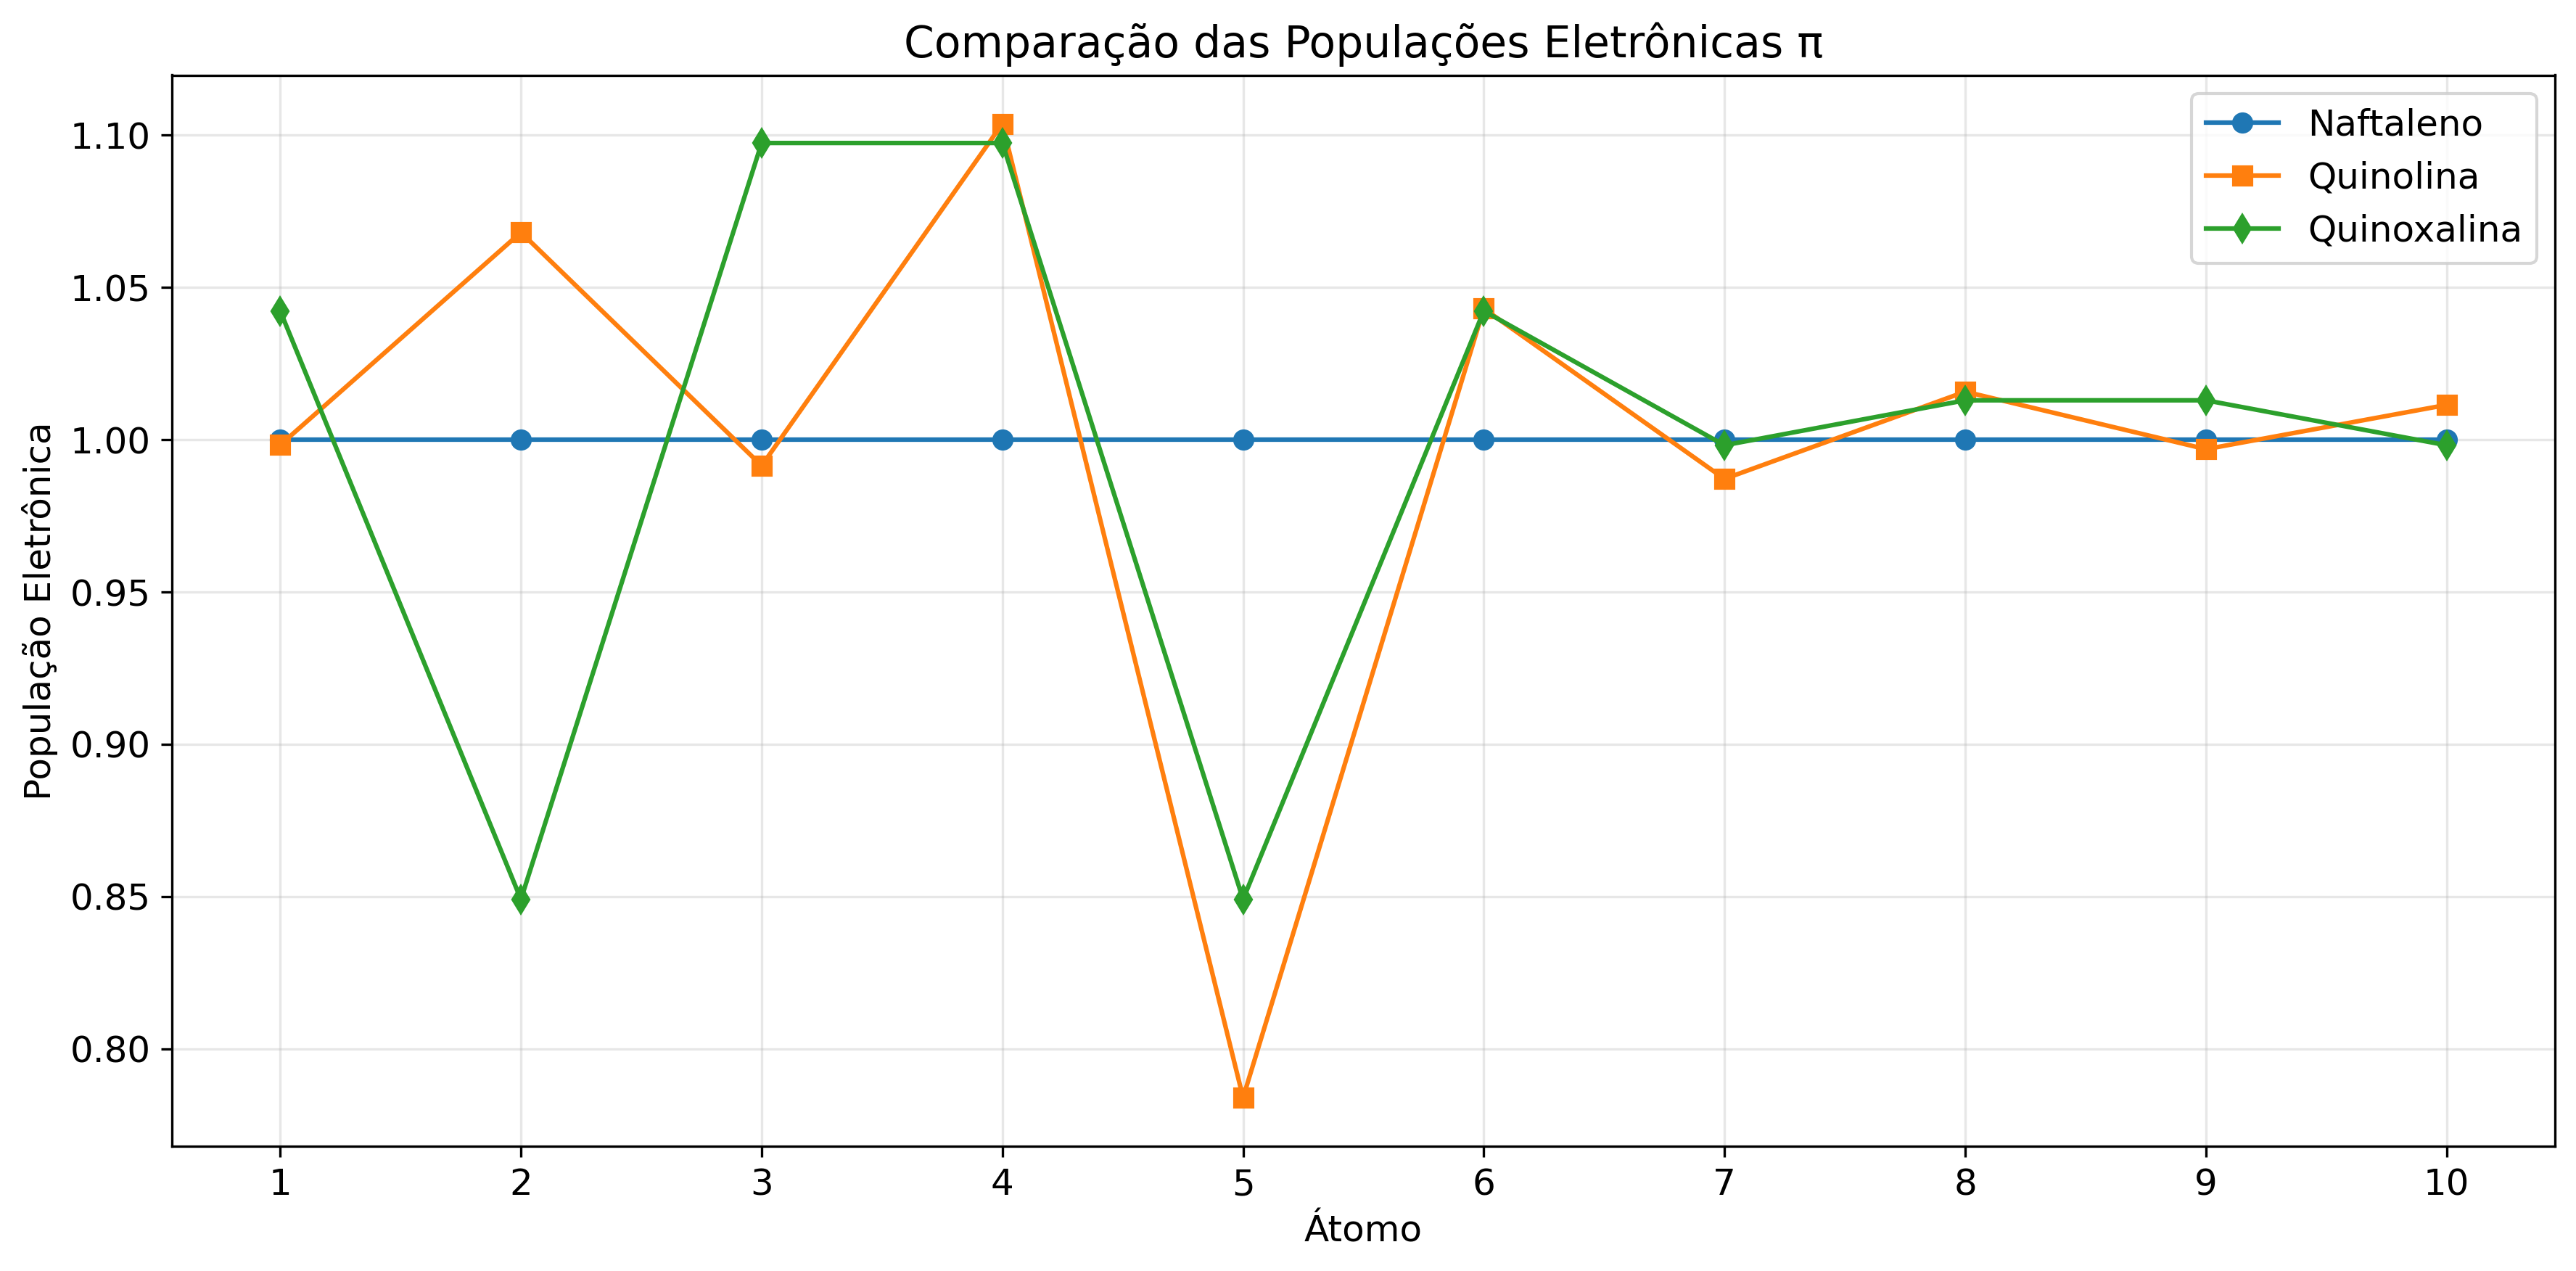


Cargas atômicas - Naftaleno:
Átomo 1: 0.000
Átomo 2: 0.000
Átomo 3: 0.000
Átomo 4: -0.000
Átomo 5: 0.000
Átomo 6: -0.000
Átomo 7: 0.000
Átomo 8: -0.000
Átomo 9: 0.000
Átomo 10: 0.000

Cargas atômicas - Quinolina:
Átomo 1: 0.002
Átomo 2: -0.068
Átomo 3: 0.009
Átomo 4: -0.104
Átomo 5: 0.216
Átomo 6: -0.043
Átomo 7: 0.013
Átomo 8: -0.016
Átomo 9: 0.003
Átomo 10: -0.011

Cargas atômicas - Quinoxalina:
Átomo 1: -0.042
Átomo 2: 0.151
Átomo 3: -0.097
Átomo 4: -0.097
Átomo 5: 0.151
Átomo 6: -0.042
Átomo 7: 0.002
Átomo 8: -0.013
Átomo 9: -0.013
Átomo 10: 0.002


In [326]:
import numpy as np
import matplotlib.pyplot as plt

# Função para calcular populações eletrônicas
def calcular_populacoes(matrix, n_eletrons):
    # Diagonalizar a matriz
    autovalores, autovetores = np.linalg.eigh(matrix)
    
    # Ordenar autovalores e autovetores
    idx = autovalores.argsort()
    autovalores = autovalores[idx]
    autovetores = autovetores[:, idx]
    
    # Calcular população de cada átomo
    populacoes = np.zeros(matrix.shape[0])
    
    for i in range(n_eletrons // 2):  # Para cada orbital ocupado
        coeficientes = autovetores[:, i]  # Coeficientes do orbital
        populacoes += 2 * coeficientes**2  # Dois elétrons por orbital
    
    return populacoes, autovalores

# Número de elétrons π (10 para todas as moléculas)
n_eletrons = 10

# Calcular populações para cada molécula
pop_naftaleno, autovalores_naftaleno = calcular_populacoes(huckel_matrix_naftaleno, n_eletrons)
pop_quinolina, autovalores_quinolina = calcular_populacoes(huckel_matrix_quinolina, n_eletrons)
pop_quinoxalina, autovalores_quinoxalina = calcular_populacoes(huckel_matrix_quinoxalina, n_eletrons)

# Imprimir resultados
print("Populações eletrônicas - Naftaleno:")
for i, pop in enumerate(pop_naftaleno):
    print(f"Átomo {i+1}: {pop:.3f}")

print("\nPopulações eletrônicas - Quinolina:")
for i, pop in enumerate(pop_quinolina):
    print(f"Átomo {i+1}: {pop:.3f}")

print("\nPopulações eletrônicas - Quinoxalina:")
for i, pop in enumerate(pop_quinoxalina):
    print(f"Átomo {i+1}: {pop:.3f}")

# Criar gráfico comparativo
atomos = np.arange(1, 11)
plt.figure(figsize=(12, 6))
plt.plot(atomos, pop_naftaleno, 'o-', label='Naftaleno')
plt.plot(atomos, pop_quinolina, 's-', label='Quinolina')
plt.plot(atomos, pop_quinoxalina, 'd-', label='Quinoxalina')
plt.xlabel('Átomo')
plt.ylabel('População Eletrônica')
plt.title('Comparação das Populações Eletrônicas π')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(atomos)
plt.tight_layout()
plt.savefig('comparacao_populacoes_eletronicas.png', dpi=300, 
        facecolor='white', edgecolor='white', 
        transparent=False)
plt.show()

# Calcular cargas atômicas (supondo 1 elétron π por átomo de carbono)
cargas_naftaleno = 1 - pop_naftaleno
cargas_quinolina = 1 - pop_quinolina
cargas_quinoxalina = 1 - pop_quinoxalina

print("\nCargas atômicas - Naftaleno:")
for i, carga in enumerate(cargas_naftaleno):
    print(f"Átomo {i+1}: {carga:.3f}")

print("\nCargas atômicas - Quinolina:")
for i, carga in enumerate(cargas_quinolina):
    print(f"Átomo {i+1}: {carga:.3f}")

print("\nCargas atômicas - Quinoxalina:")
for i, carga in enumerate(cargas_quinoxalina):
    print(f"Átomo {i+1}: {carga:.3f}")

### Ordens de ligação

Ordens de Ligação - Naftaleno:
Ligação (2, 3): 0.725
Ligação (4, 5): 0.725
Ligação (7, 8): 0.725
Ligação (9, 10): 0.725
Ligação (3, 4): 0.603
Ligação (8, 9): 0.603
Ligação (5, 6): 0.555
Ligação (6, 7): 0.555
Ligação (1, 2): 0.555
Ligação (1, 10): 0.555
Ligação (1, 6): 0.518

Ordens de Ligação - Quinolina:
Ligação (9, 10): 0.724
Ligação (7, 8): 0.723
Ligação (2, 3): 0.721
Ligação (4, 5): 0.707
Ligação (3, 4): 0.608
Ligação (8, 9): 0.604
Ligação (6, 7): 0.559
Ligação (1, 10): 0.555
Ligação (1, 2): 0.553
Ligação (5, 6): 0.541
Ligação (1, 6): 0.520

Ordens de Ligação - Quinoxalina:
Ligação (9, 10): 0.725
Ligação (7, 8): 0.725
Ligação (2, 3): 0.718
Ligação (4, 5): 0.718
Ligação (8, 9): 0.602
Ligação (3, 4): 0.593
Ligação (1, 10): 0.556
Ligação (6, 7): 0.556
Ligação (1, 2): 0.549
Ligação (5, 6): 0.549
Ligação (1, 6): 0.514


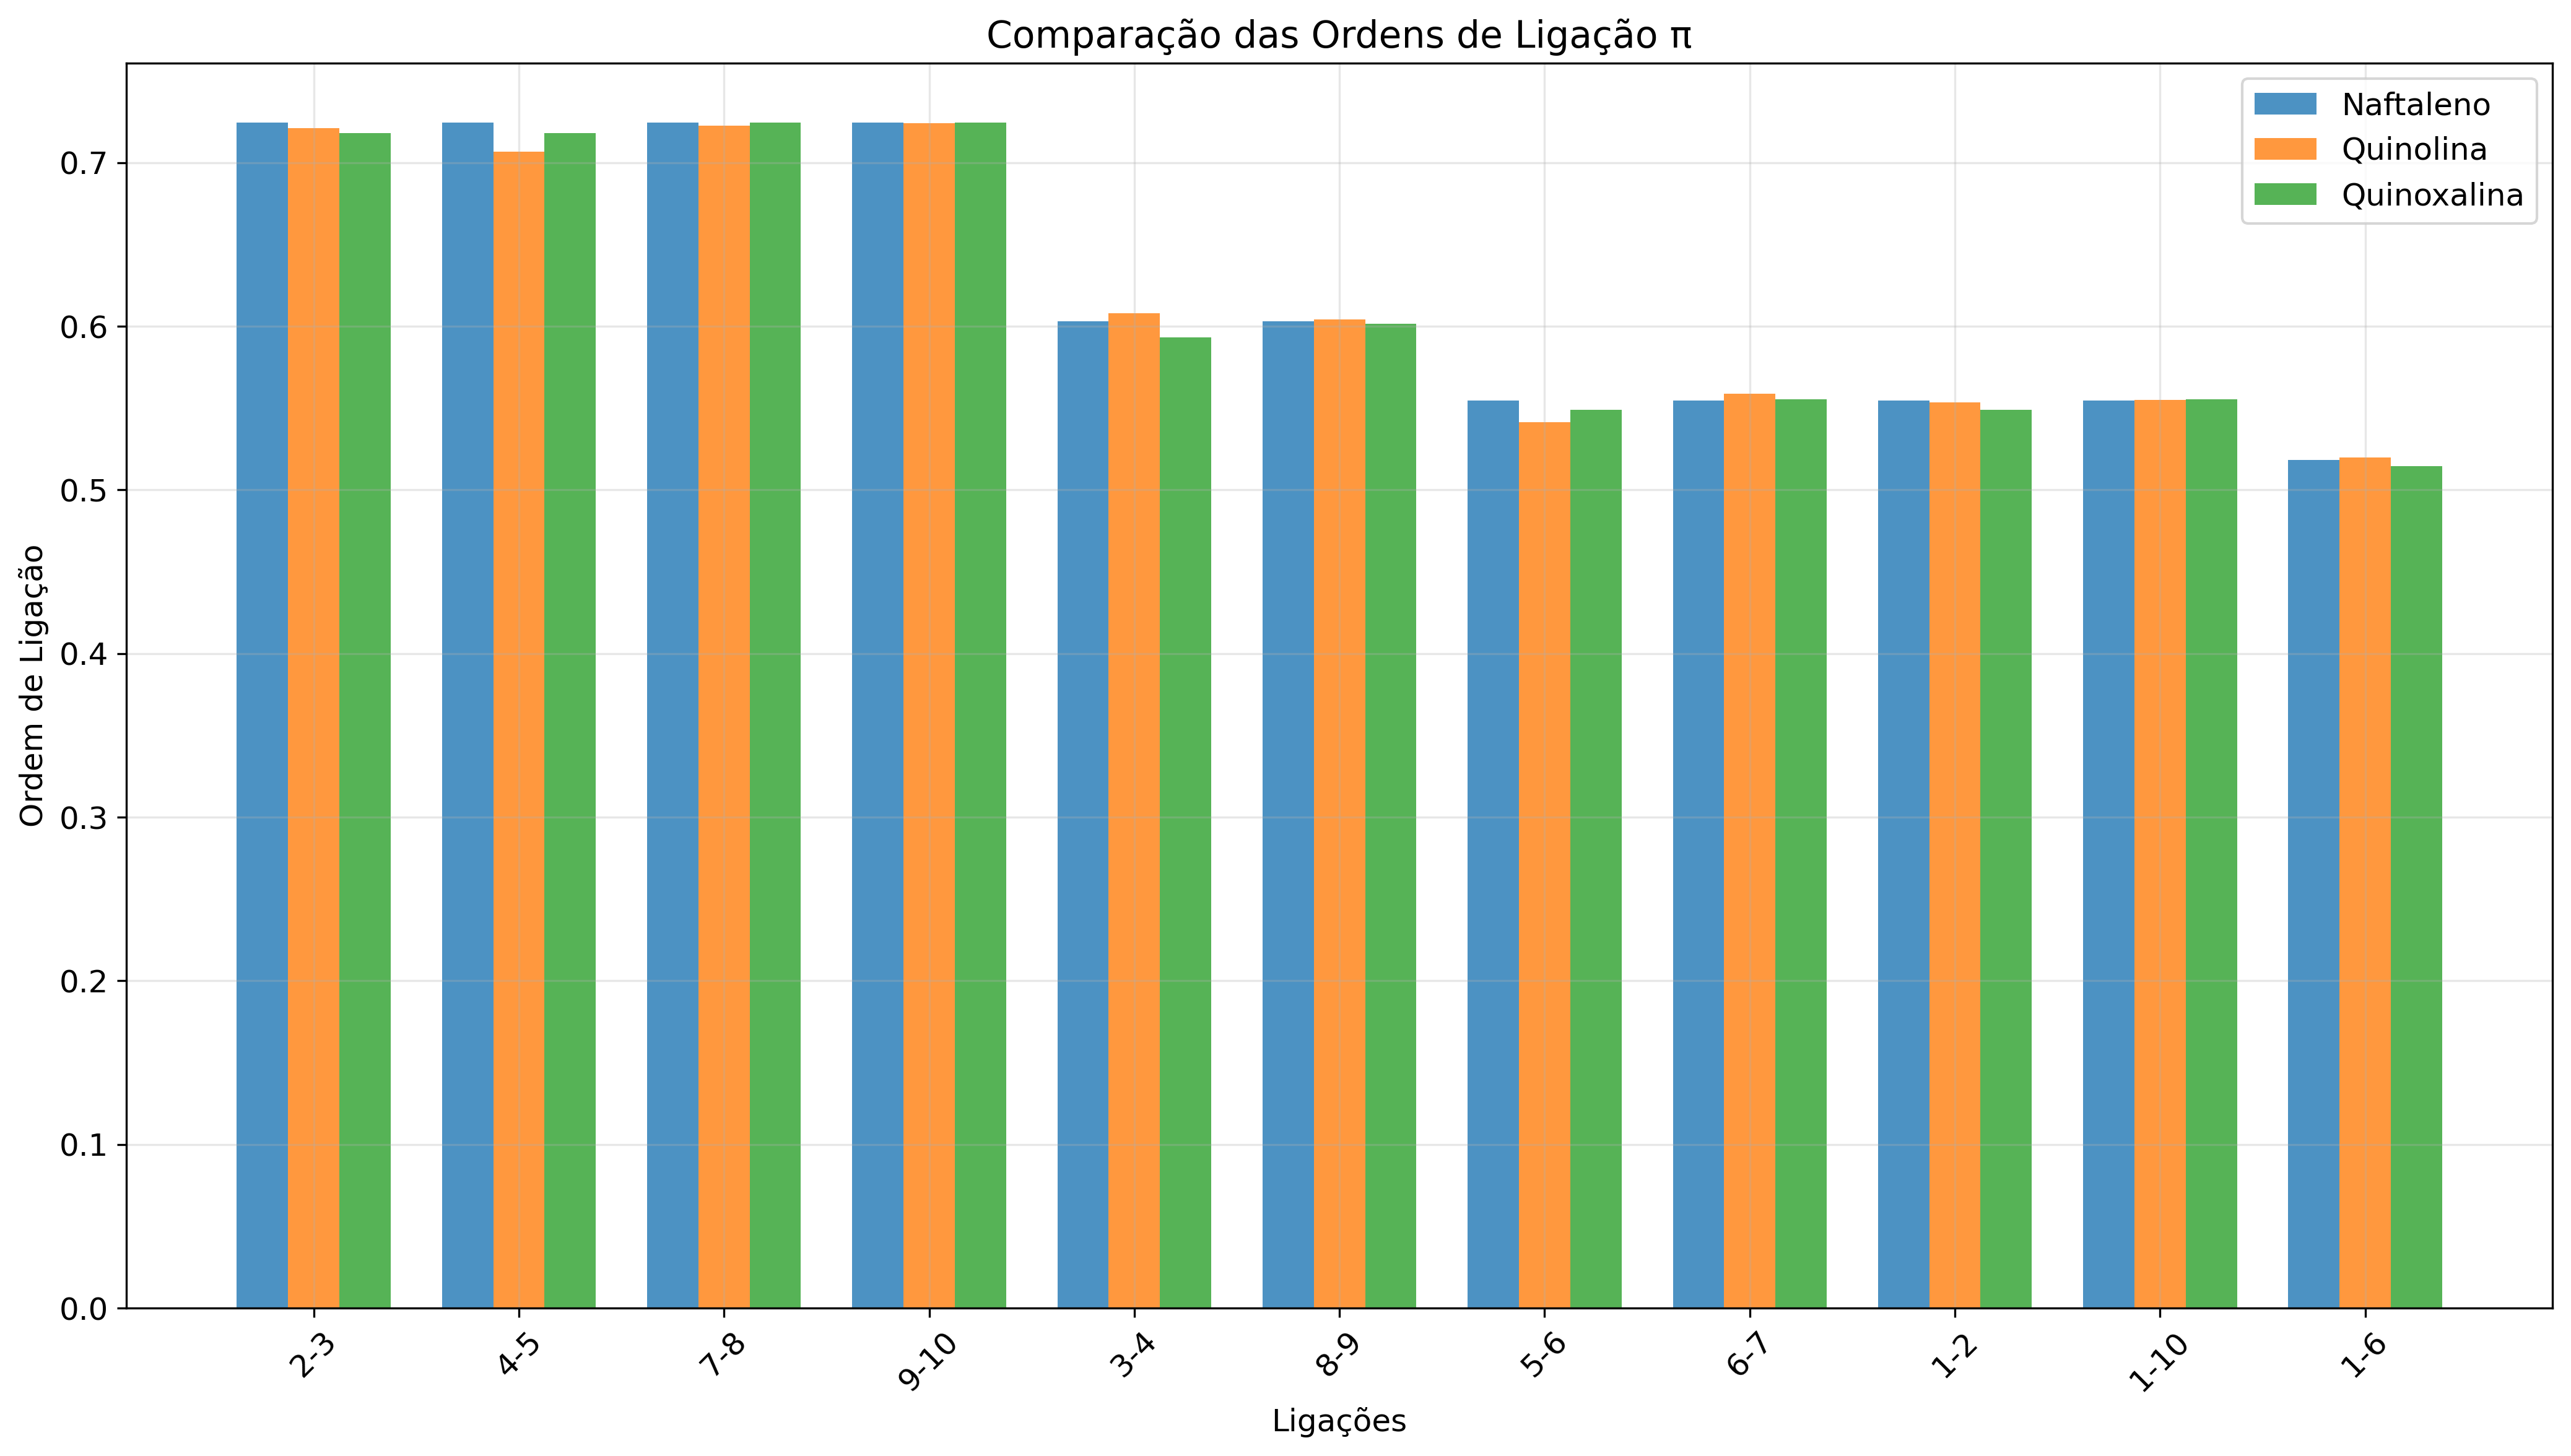


Ordem de ligação média - Naftaleno: 0.622
Ordem de ligação média - Quinolina: 0.620
Ordem de ligação média - Quinoxalina: 0.619

Ligações com maior diferença:


In [327]:
import numpy as np
import matplotlib.pyplot as plt

def calcular_ordens_ligacao(matrix, n_eletrons):
    # Diagonalizar a matriz
    autovalores, autovetores = np.linalg.eigh(matrix)
    
    # Ordenar autovalores e autovetores
    idx = autovalores.argsort()
    autovalores = autovalores[idx]
    autovetores = autovetores[:, idx]
    
    # Calcular ordens de ligação
    n_atomos = matrix.shape[0]
    ordens_ligacao = np.zeros((n_atomos, n_atomos))
    
    for i in range(n_atomos):
        for j in range(i + 1, n_atomos):
            if matrix[i, j] != 0:  # Apenas para átomos ligados
                ordem = 0.0
                for k in range(n_eletrons // 2):  # Orbitais ocupados
                    ordem += 2 * autovetores[i, k] * autovetores[j, k]
                ordens_ligacao[i, j] = ordem
                ordens_ligacao[j, i] = ordem
    
    return ordens_ligacao

# Número de elétrons π
n_eletrons = 10

# Calcular ordens de ligação para cada molécula
ordens_naftaleno = calcular_ordens_ligacao(huckel_matrix_naftaleno, n_eletrons)
ordens_quinolina = calcular_ordens_ligacao(huckel_matrix_quinolina, n_eletrons)
ordens_quinoxalina = calcular_ordens_ligacao(huckel_matrix_quinoxalina, n_eletrons)

# Função para extrair ligações não-nulas
def extrair_ligacoes(ordens_matrix):
    ligacoes = []
    n = ordens_matrix.shape[0]
    for i in range(n):
        for j in range(i + 1, n):
            if ordens_matrix[i, j] != 0:
                ligacoes.append(((i+1, j+1), ordens_matrix[i, j]))
    return sorted(ligacoes, key=lambda x: x[1], reverse=True)

# Extrair ligações
ligacoes_naftaleno = extrair_ligacoes(ordens_naftaleno)
ligacoes_quinolina = extrair_ligacoes(ordens_quinolina)
ligacoes_quinoxalina = extrair_ligacoes(ordens_quinoxalina)

# Imprimir resultados
print("Ordens de Ligação - Naftaleno:")
for lig, ordem in ligacoes_naftaleno:
    print(f"Ligação {lig}: {ordem:.3f}")

print("\nOrdens de Ligação - Quinolina:")
for lig, ordem in ligacoes_quinolina:
    print(f"Ligação {lig}: {ordem:.3f}")

print("\nOrdens de Ligação - Quinoxalina:")
for lig, ordem in ligacoes_quinoxalina:
    print(f"Ligação {lig}: {ordem:.3f}")

# Criar gráfico comparativo
ligacoes = [f"{lig[0]}-{lig[1]}" for lig, _ in ligacoes_naftaleno]
ordens_n = [ordem for _, ordem in ligacoes_naftaleno]
ordens_q = [next((ordem for (lig, ordem) in ligacoes_quinolina if lig == ligacao), 0) 
            for ligacao, _ in ligacoes_naftaleno]
ordens_qx = [next((ordem for (lig, ordem) in ligacoes_quinoxalina if lig == ligacao), 0) 
             for ligacao, _ in ligacoes_naftaleno]

x = np.arange(len(ligacoes))
width = 0.25

plt.figure(figsize=(14, 8))
plt.bar(x - width, ordens_n, width, label='Naftaleno', alpha=0.8)
plt.bar(x, ordens_q, width, label='Quinolina', alpha=0.8)
plt.bar(x + width, ordens_qx, width, label='Quinoxalina', alpha=0.8)

plt.xlabel('Ligações')
plt.ylabel('Ordem de Ligação')
plt.title('Comparação das Ordens de Ligação π')
plt.xticks(x, ligacoes, rotation=45)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('comparacao_ordens_ligacao.png', dpi=300, 
        facecolor='white', edgecolor='white', 
        transparent=False)
plt.show()

# Calcular ordens médias
print(f"\nOrdem de ligação média - Naftaleno: {np.mean(ordens_n):.3f}")
print(f"Ordem de ligação média - Quinolina: {np.mean(ordens_q):.3f}")
print(f"Ordem de ligação média - Quinoxalina: {np.mean(ordens_qx):.3f}")

# Identificar ligações com maior variação
print("\nLigações com maior diferença:")
for i, lig in enumerate(ligacoes):
    diff = max(ordens_n[i], ordens_q[i], ordens_qx[i]) - min(ordens_n[i], ordens_q[i], ordens_qx[i])
    if diff > 0.05:
        print(f"Ligação {lig}: Δ = {diff:.3f}")

### Mapas HOMO e LUMO

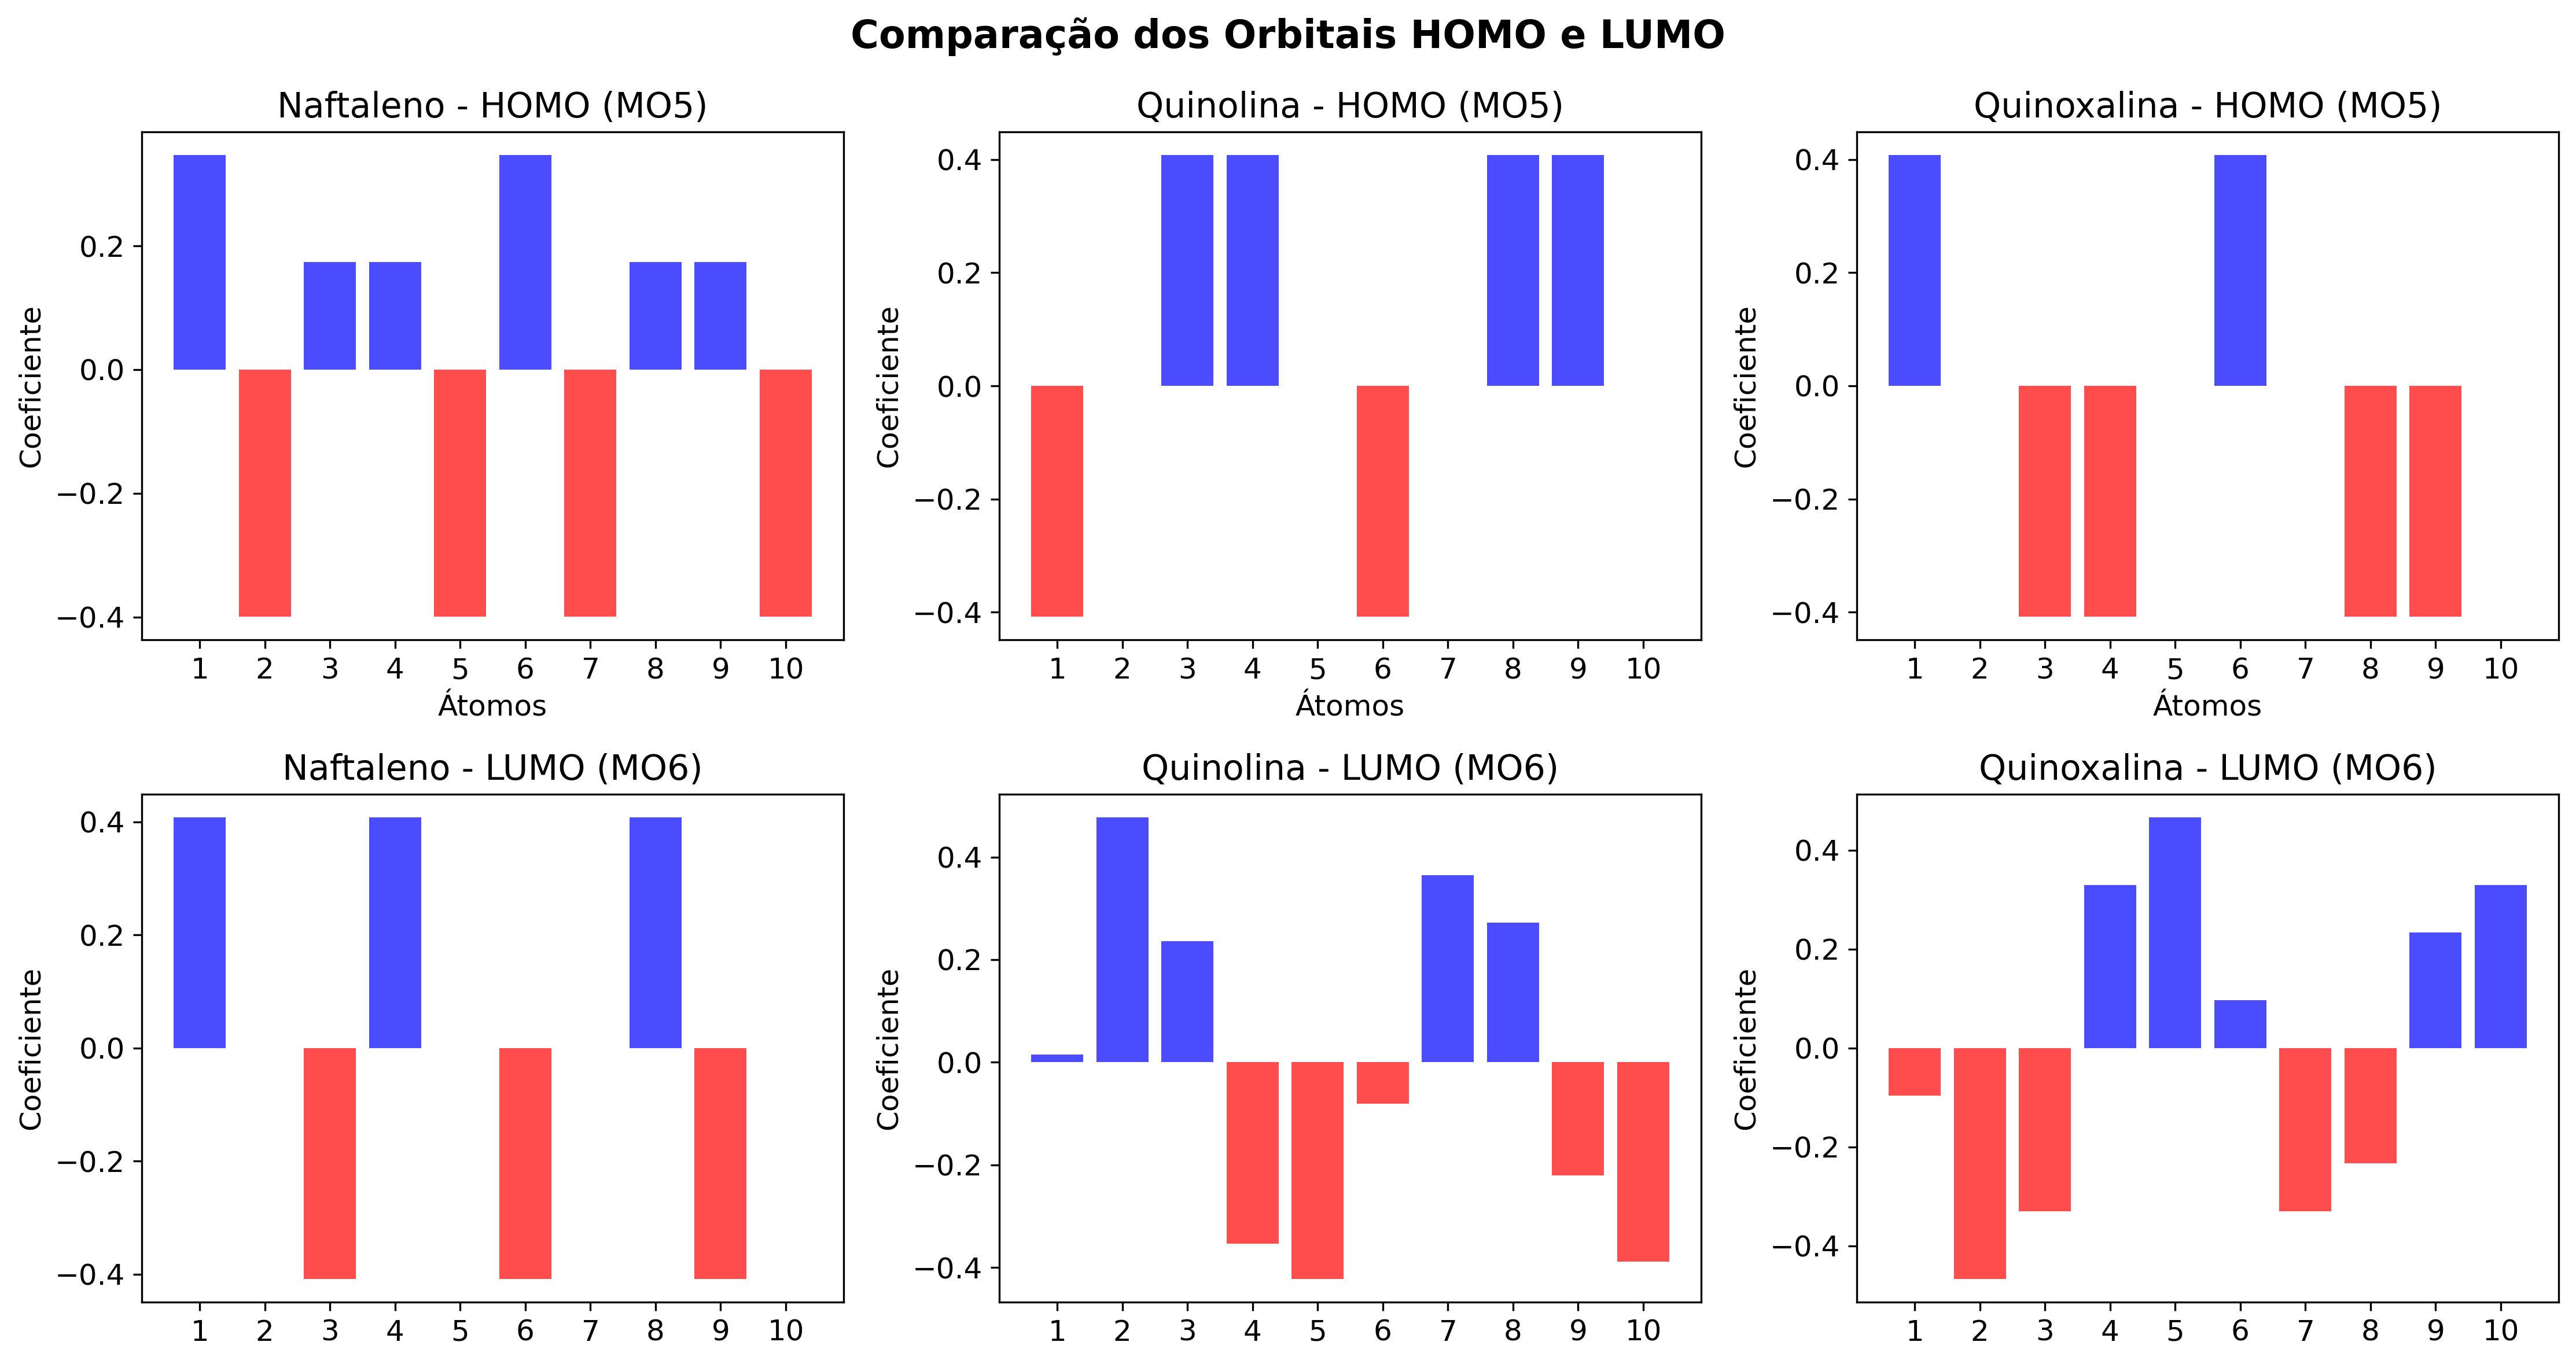

Valores HOMO e LUMO para cada molécula:
Naftaleno: HOMO = -0.618, LUMO = 0.618
Quinolina: HOMO = -0.527, LUMO = 0.703
Quinoxalina: HOMO = -0.414, LUMO = 0.764


In [329]:
import numpy as np
import matplotlib.pyplot as plt

def plotar_orbitais_comparativos(autovetores_naft, homo_naft_idx, lumo_naft_idx,
                                autovetores_quin, homo_quin_idx, lumo_quin_idx,
                                autovetores_quinox, homo_quinox_idx, lumo_quinox_idx,
                                atom_labels):
    """Plota os orbitais HOMO e LUMO comparativos para as três moléculas"""
    
    # Configurar a figura com 2 linhas (HOMO e LUMO) e 3 colunas (moléculas)
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    fig.suptitle('Comparação dos Orbitais HOMO e LUMO', fontsize=16, fontweight='bold')
    
    # Nomes das moléculas
    moleculas = ['Naftaleno', 'Quinolina', 'Quinoxalina']
    
    # Dados para cada molécula
    dados = [
        (autovetores_naft, homo_naft_idx, lumo_naft_idx),
        (autovetores_quin, homo_quin_idx, lumo_quin_idx),
        (autovetores_quinox, homo_quinox_idx, lumo_quinox_idx)
    ]
    
    # Plotar para cada molécula
    for col, (autovetores, homo_idx, lumo_idx) in enumerate(dados):
        # HOMO
        homo = autovetores[:, homo_idx]
        axes[0, col].bar(atom_labels, homo, color=['red' if x < 0 else 'blue' for x in homo], alpha=0.7)
        axes[0, col].set_title(f'{moleculas[col]} - HOMO (MO{homo_idx+1})')
        axes[0, col].set_ylabel('Coeficiente')
        axes[0, col].set_xlabel('Átomos')
        axes[0, col].tick_params(axis='x', rotation=0)
        
        # LUMO
        lumo = autovetores[:, lumo_idx]
        axes[1, col].bar(atom_labels, lumo, color=['red' if x < 0 else 'blue' for x in lumo], alpha=0.7)
        axes[1, col].set_title(f'{moleculas[col]} - LUMO (MO{lumo_idx+1})')
        axes[1, col].set_ylabel('Coeficiente')
        axes[0, col].set_xlabel('Átomos')
        axes[1, col].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.savefig('comparacao_homo_lumo_todas_moleculas.png', dpi=300, bbox_inches='tight', 
        facecolor='white', edgecolor='white', 
        transparent=False)
    plt.show()

# Exemplo de uso:
# Primeiro, calcule os índices HOMO e LUMO para cada molécula
# Supondo que você já tem:
# autovetores_naftaleno, autovetores_quinolina, autovetores_quinoxalina
# homo_naftaleno_idx, homo_quinolina_idx, homo_quinoxalina_idx
# lumo_naftaleno_idx, lumo_quinolina_idx, lumo_quinoxalina_idx

# Rótulos dos átomos - ajuste conforme necessário para cada molécula
atom_labels = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10']

# Chamar a função
plotar_orbitais_comparativos(
    autovetores_naftaleno, homo_naftaleno_idx, lumo_naftaleno_idx,
    autovetores_quinolina, homo_quinolina_idx, lumo_quinolina_idx,
    autovetores_quinoxalina, homo_quinoxalina_idx, lumo_quinoxalina_idx,
    atom_labels
)

print("Valores HOMO e LUMO para cada molécula:")
print(f"Naftaleno: HOMO = {autovalores_naftaleno[homo_naftaleno_idx]:.3f}, LUMO = {autovalores_naftaleno[lumo_naftaleno_idx]:.3f}")
print(f"Quinolina: HOMO = {autovalores_quinolina[homo_quinolina_idx]:.3f}, LUMO = {autovalores_quinolina[lumo_quinolina_idx]:.3f}")
print(f"Quinoxalina: HOMO = {autovalores_quinoxalina[homo_quinoxalina_idx]:.3f}, LUMO = {autovalores_quinoxalina[lumo_quinoxalina_idx]:.3f}")

### Entrega Exercício 2

#### 1. Esquema do naftaleno numerado:

![alt text](numeracao_naftaleno_v2.jpg)

#### 2. Esquemas da Quinolina e Quinoxalina

![alt text](numeracao_quinolina_v2.jpg)

![alt text](numeracao_quinoxalina_v2.jpg)

#### 3. Matriz de conectividade:

In [ ]:
martiz_conectividade = [[0,1,0,0,0,1,0,0,0,1],
                        [1,0,1,0,0,0,0,0,0,0],
                        [0,1,0,1,0,0,0,0,0,0],
                        [0,0,1,0,1,0,0,0,0,0],
                        [0,0,0,1,0,1,0,0,0,0],
                        [1,0,0,0,1,0,1,0,0,0],
                        [0,0,0,0,0,1,0,1,0,0],
                        [0,0,0,0,0,0,1,0,1,0],
                        [0,0,0,0,0,0,0,1,0,1],
                        [1,0,0,0,0,0,0,0,1,0],
                                               ]

#### 4. Expectros de Energias do naftaleno com HOMO e LUMO marcados:

![alt text](diagrama_niveis_naftaleno.png)

#### 5. Autovalores Naftaleno:

In [340]:
for i in range(len(autovalores_naftaleno)):
    print(f"Autovalor {i+1}: {autovalores_naftaleno[i]:.4f}")

Autovalor 1: -2.3028
Autovalor 2: -1.6180
Autovalor 3: -1.3028
Autovalor 4: -1.0000
Autovalor 5: -0.6180
Autovalor 6: 0.6180
Autovalor 7: 1.0000
Autovalor 8: 1.3028
Autovalor 9: 1.6180
Autovalor 10: 2.3028


#### 6. Espectros para quinolina e quinoxalina

![alt text](diagrama_QuinolinaXQuinoxalina.png)

#### 7. Populações 3 moléculas

![alt text](comparacao_populacoes_eletronicas.png)

#### 8. Tabela ordens todas as moléculas:

![alt text](comparacao_ordens_ligacao.png)

#### 9-10 mapas HOMO e LUMO todas as moleculas:

![alt text](comparacao_homo_lumo_todas_moleculas.png)

#### 11. Texto Final